In [1]:
%load_ext autoreload
%autoreload 2

import os
from os.path import join
import numpy as np
import Pk_library as PKL
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('./style.mcstyle')

import h5py

In [126]:
from cmass.utils import load_params
lhid = 0
# wdir = '/home/mattho/git/ltu-cmass/data/'
wdir = '/anvil/scratch/x-mho1/cmass-ili/'
cosmo = load_params(lhid, '../params/latin_hypercube_params.txt')

## Look at Field

In [57]:
# Load 1gpc/h simulation

cdir = wdir+f'quijotelike/fastpm/L1000-N128/{lhid}'
with h5py.File(join(cdir, 'nbody.h5'), 'r') as f:
    a = list(f.keys())[-1]
    rhoc = f[a]['rho'][...]
    fvelc = np.stack([f[a]['fvel'][..., i] for i in range(3)], axis=0)

In [62]:
# Load FastPM

import pickle

# lhid=3
fdir = wdir+'/scratch/fastpm'

# f'')
filename = join(
    fdir, 'density_HR_full_m_res_128_z=0.5_nbatch_8_nfilter_3_ncnn_0.pk')
filename = join(
    fdir, f'LH{lhid}_density_HR_full_m_res_128_z=0.5_nbatch_8_nfilter_3_ncnn_0.pk')

with open(filename, 'rb') as f:
    print(filename)
    d = pickle.load(f)
rhof = d['density_cic_unpad_combined']

filename = join(
    fdir, 'velocity_HR_full_m_res_128_z=0.5_nbatch_8_nfilter_3_ncnn_0.pk')
with open(filename, 'rb') as f:
    d = pickle.load(f)
# np.stack(d['velocity_cic_unpad_combined'], axis=-1)
fvelf = d['velocity_cic_unpad_combined']

/anvil/scratch/x-mho1/cmass-ili//scratch/fastpm/LH0_density_HR_full_m_res_128_z=0.5_nbatch_8_nfilter_3_ncnn_0.pk


In [60]:
fdir

'/anvil/scratch/x-mho1/cmass-ili//scratch/fastpm'

In [63]:
# Load quijote simulation
qdir = f'/anvil/scratch/x-mho1/quijote/density_field/latin_hypercube/{lhid}/'
rhoq = np.load(join(qdir, 'df_m_128_z=0.npy'))

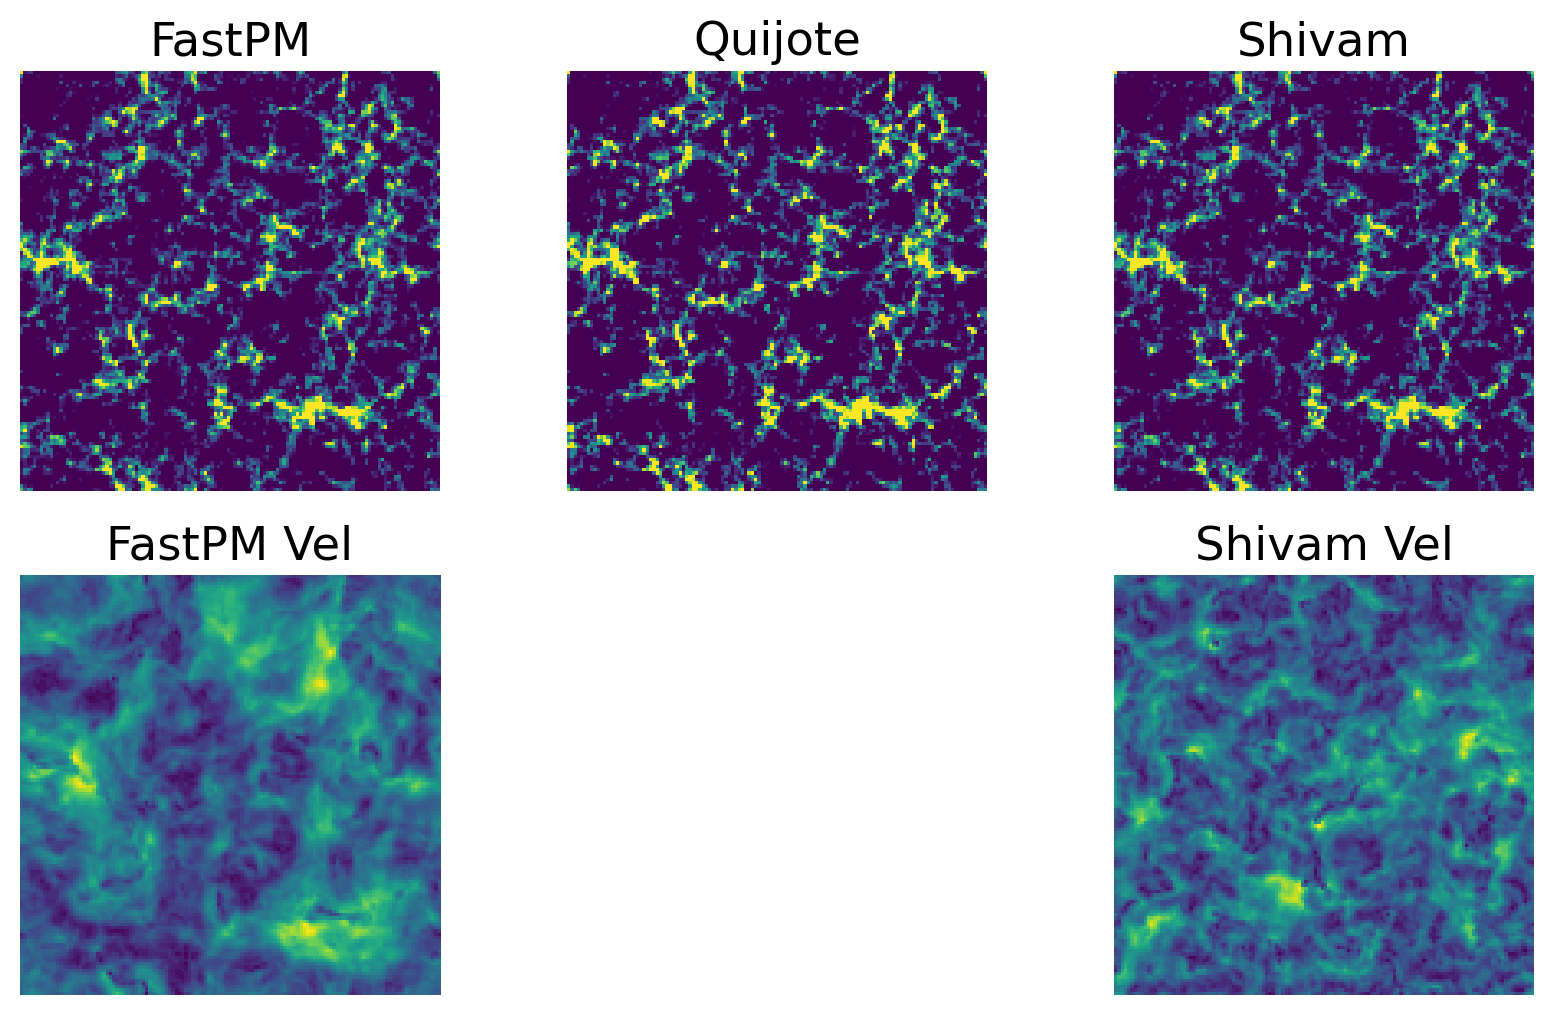

In [64]:
f, axs = plt.subplots(2, 3, figsize=(10, 6))
axs = axs.flatten()
axs[0].imshow(rhoc[50:60].sum(axis=0), vmin=-1, vmax=10)
axs[0].set_title('FastPM')
axs[1].imshow(rhoq[50:60].sum(axis=0), vmin=-1, vmax=10)
axs[1].set_title('Quijote')
axs[2].imshow(rhof[50:60].sum(axis=0), vmin=-1, vmax=10)
axs[2].set_title('Shivam')
axs[3].imshow(np.linalg.norm(fvelc[:, 55], axis=0))
axs[3].set_title('FastPM Vel')
axs[5].imshow(np.linalg.norm(fvelf[:, 55], axis=0))
axs[5].set_title('Shivam Vel')
for ax in axs:
    ax.axis('off')

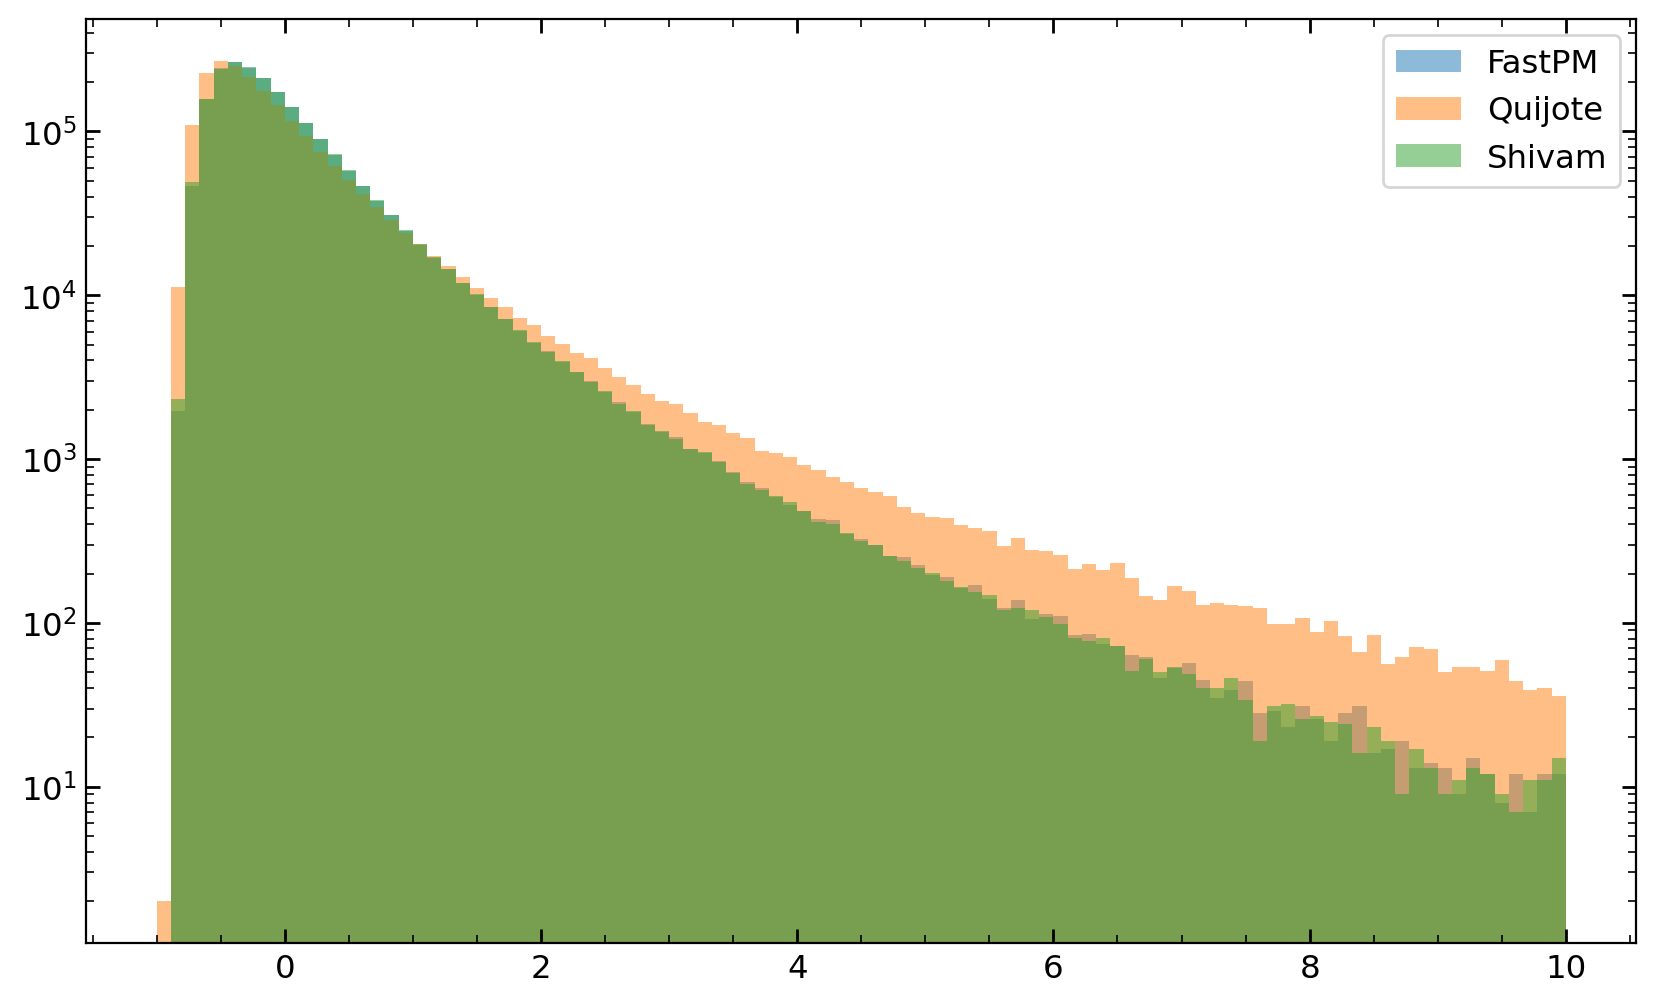

In [65]:
be = np.linspace(-1, 10, 100)
plt.semilogy()
plt.hist(rhoc.flatten(), bins=be, alpha=0.5, label='FastPM')
plt.hist(rhoq.flatten(), bins=be, alpha=0.5, label='Quijote')
plt.hist(rhof.flatten(), bins=be, alpha=0.5, label='Shivam')
plt.legend()

Text(0, 0.5, 'From Shivam')

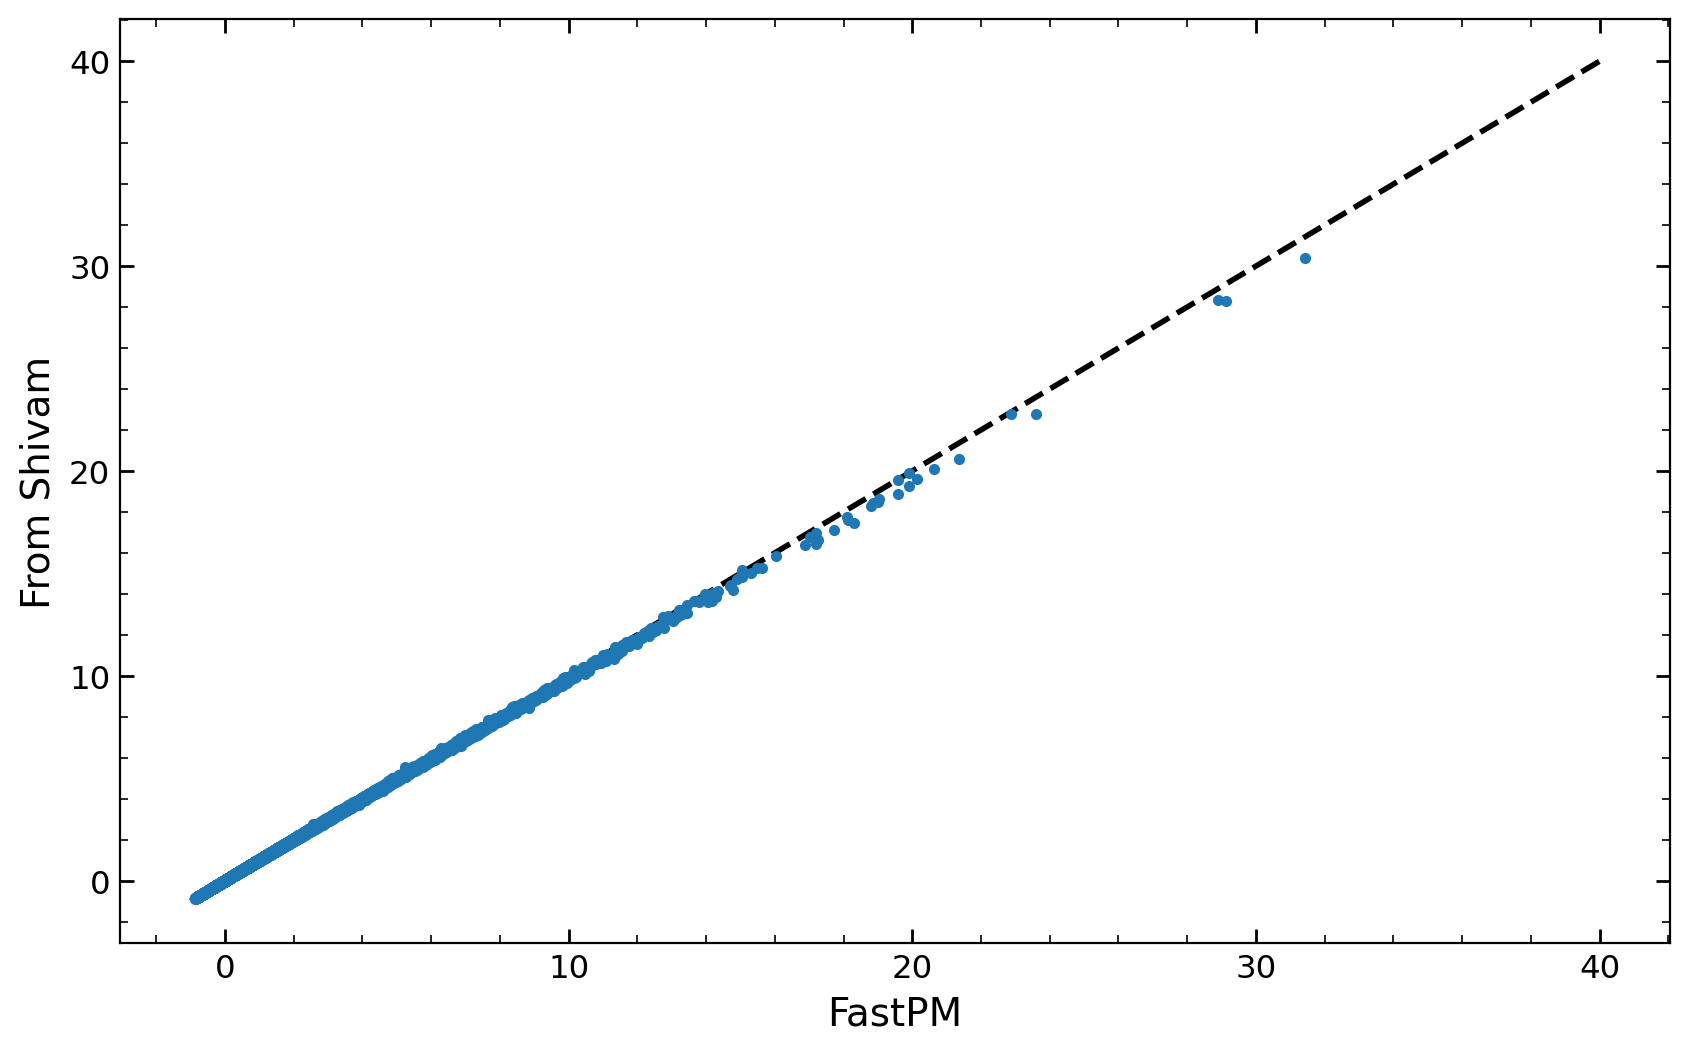

In [67]:
plt.plot([-1, 40], [-1, 40], 'k--')
plt.plot(rhoc.flatten(), rhof.flatten(), '.', alpha=1)
# plt.xlim(-1,6)
# plt.ylim(-1,6)
plt.xlabel('FastPM')
plt.ylabel('From Shivam')

0.011018898

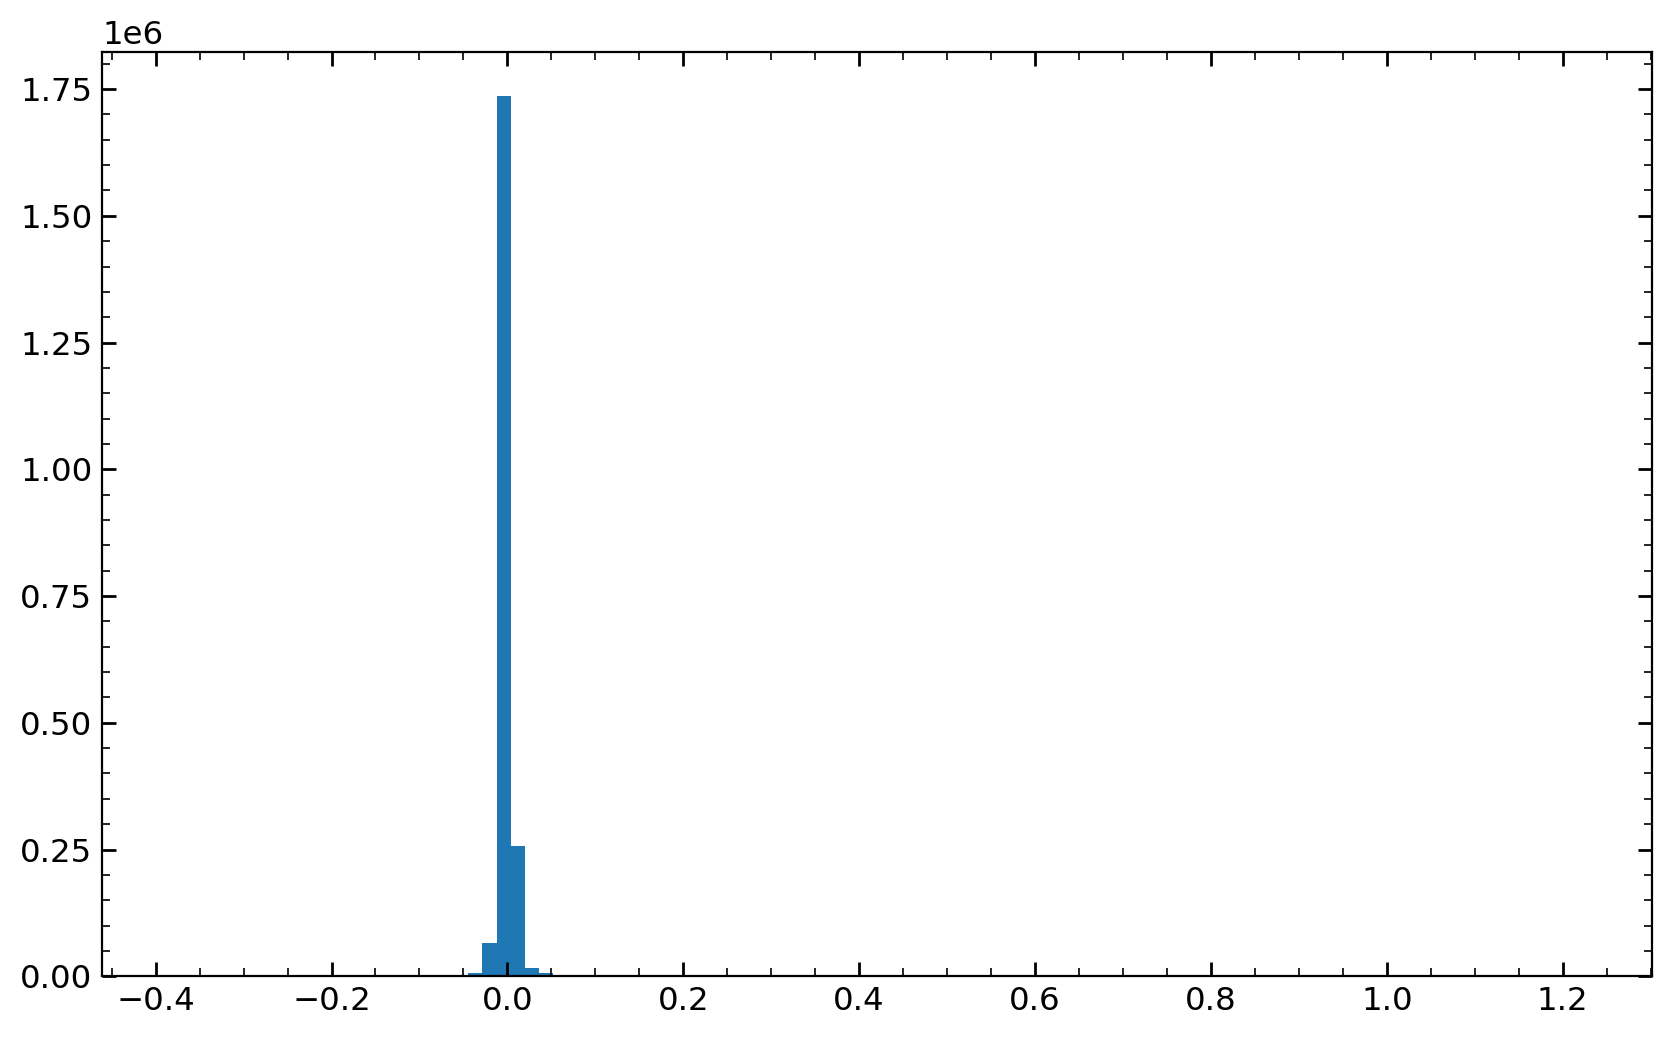

In [55]:
plt.hist(rhoc.flatten() - rhof.flatten(), 100)
np.std(rhoc.flatten() - rhof.flatten())/np.std(rhoc.flatten())

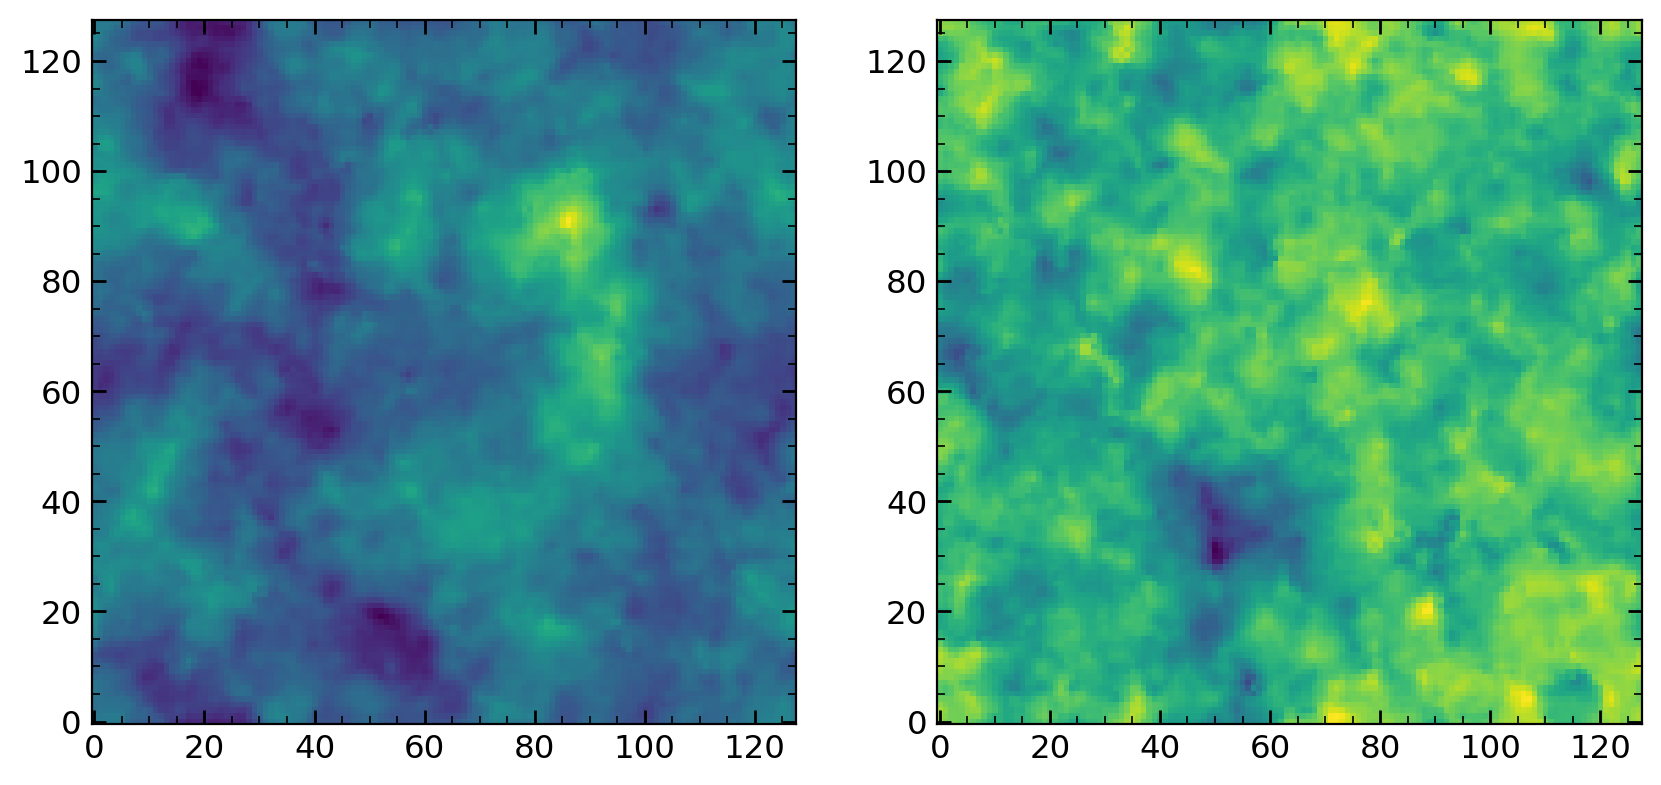

In [ ]:
f, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(fvelc[0, 0])
axs[1].imshow(fvelf[0, 0])

Text(0, 0.5, 'Quijote')

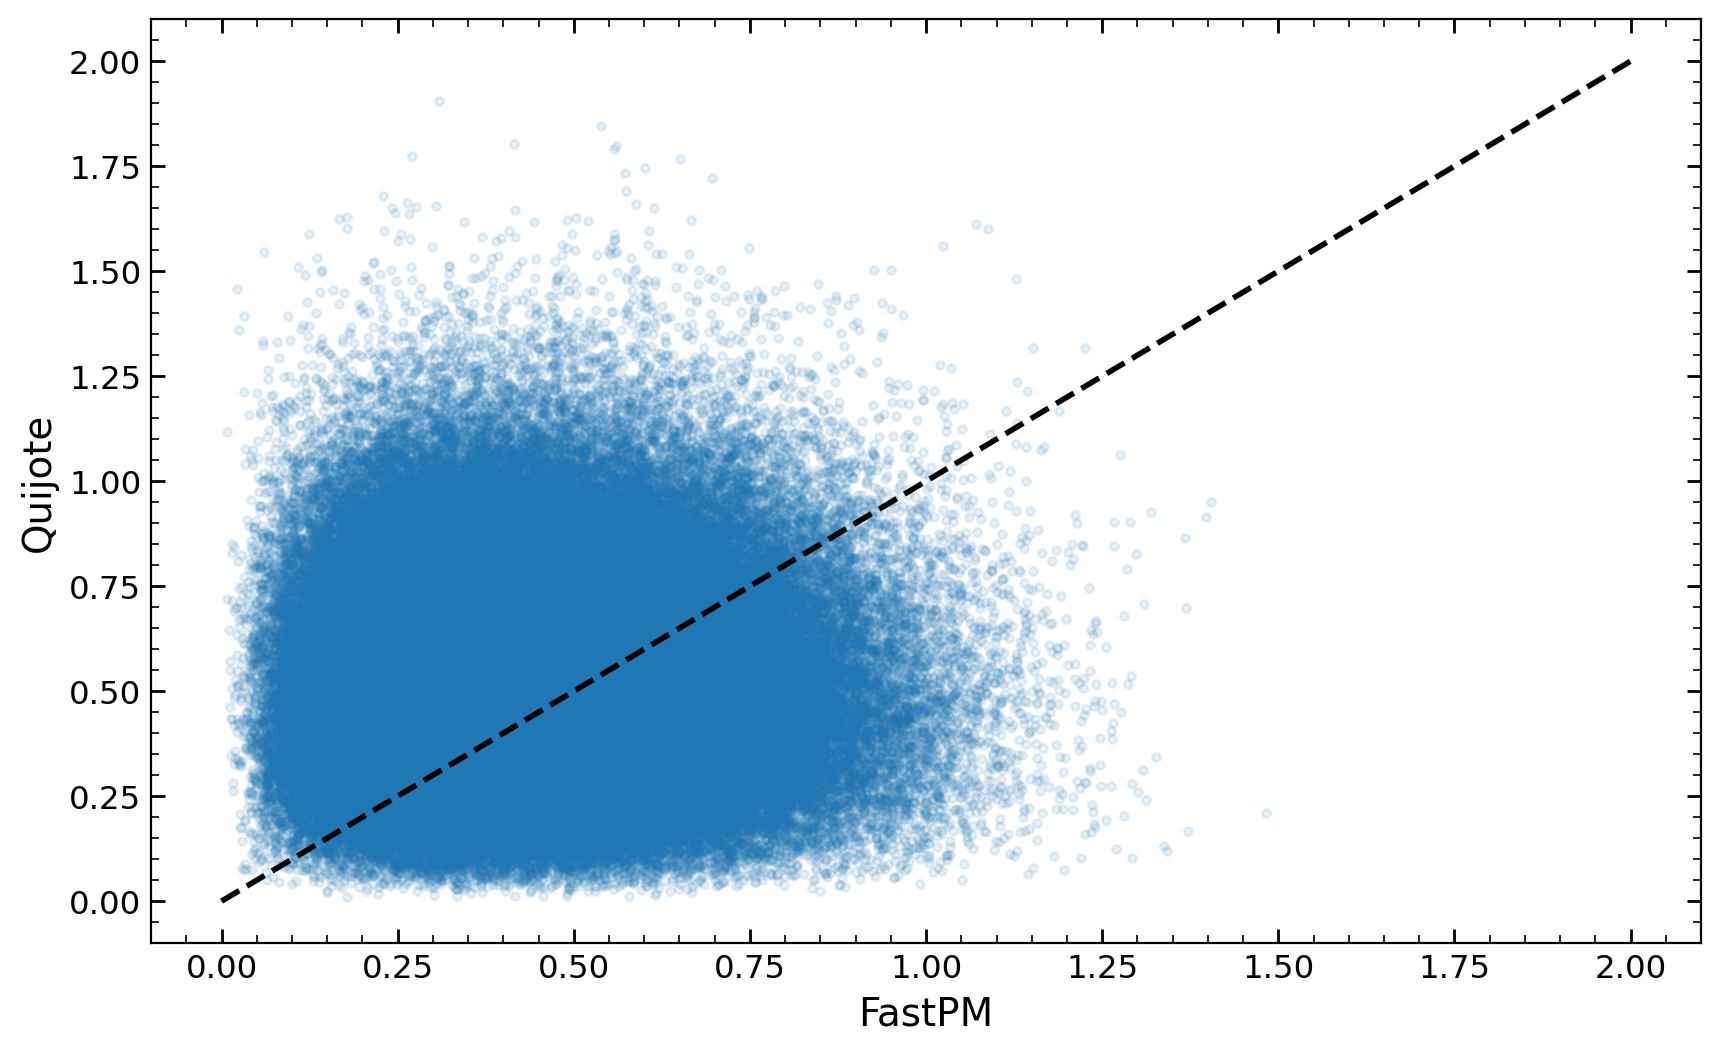

In [12]:
x_ = np.linalg.norm(fvelc, axis=0).flatten()[::10]/1e3/1.5
y_ = np.linalg.norm(fvelf, axis=0).flatten()[::10]
plt.figure()
plt.plot(x_, y_, '.', alpha=0.1)
plt.plot([0, 2], [0, 2], 'k--')
plt.xlabel('FastPM')
plt.ylabel('Quijote')

## Look at Halos

In [132]:
# look at halos
lhid = 0
cdir = wdir+f'quijotelike/fastpm/L1000-N128/{lhid}'
with h5py.File(join(cdir, 'halos.h5'), 'r') as f:
    a = list(f.keys())[-1]
    print(f[a].keys())
    hpos = f[a]['pos'][...]
    hvel = f[a]['vel'][...]
    hmass = f[a]['mass'][...]

<KeysViewHDF5 ['concentration', 'mass', 'pos', 'vel']>


In [131]:
# # Load Quijote

snapnum = 3
isim_fid = lhid+1
mass_type = 'rockstar_200c'
snap_dir_base = '/anvil/scratch/x-mho1/quijote/Halos/Rockstar/latin_hypercube_HR'
snapdir = snap_dir_base + '/' + str(isim_fid)  # folder hosting the catalogue
rockstar = np.loadtxt(snapdir + '/out_' + str(snapnum) + '_pid.list',)
#   usecols=np.arange(41))
with open(snapdir + '/out_' + str(snapnum) + '_pid.list', 'r') as f:
    lines = f.readlines()
header = lines[0].split()
# get the properties of the halos
pos_h_truth = rockstar[:, header.index('X'):header.index('Z')+1]
vel_h_truth = rockstar[:, header.index('VX'):header.index('VZ')+1]
if mass_type == 'rockstar_vir':
    index_M = header.index('Mvir')
    mass_truth = rockstar[:, index_M]  # Halo masses in Msun/h
if mass_type == 'rockstar_200c':
    index_M = header.index('M200c')
    mass_truth = rockstar[:, index_M]  # Halo masses in Msun/h


# Conform
qmass = np.log10(mass_truth)
mask = qmass > np.log10(5e12)
qmass = qmass[mask]
qpos = pos_h_truth[mask]
qvel = vel_h_truth[mask]

ValueError: the number of columns changed from 42 to 69 at row 23299; use `usecols` to select a subset and avoid this error

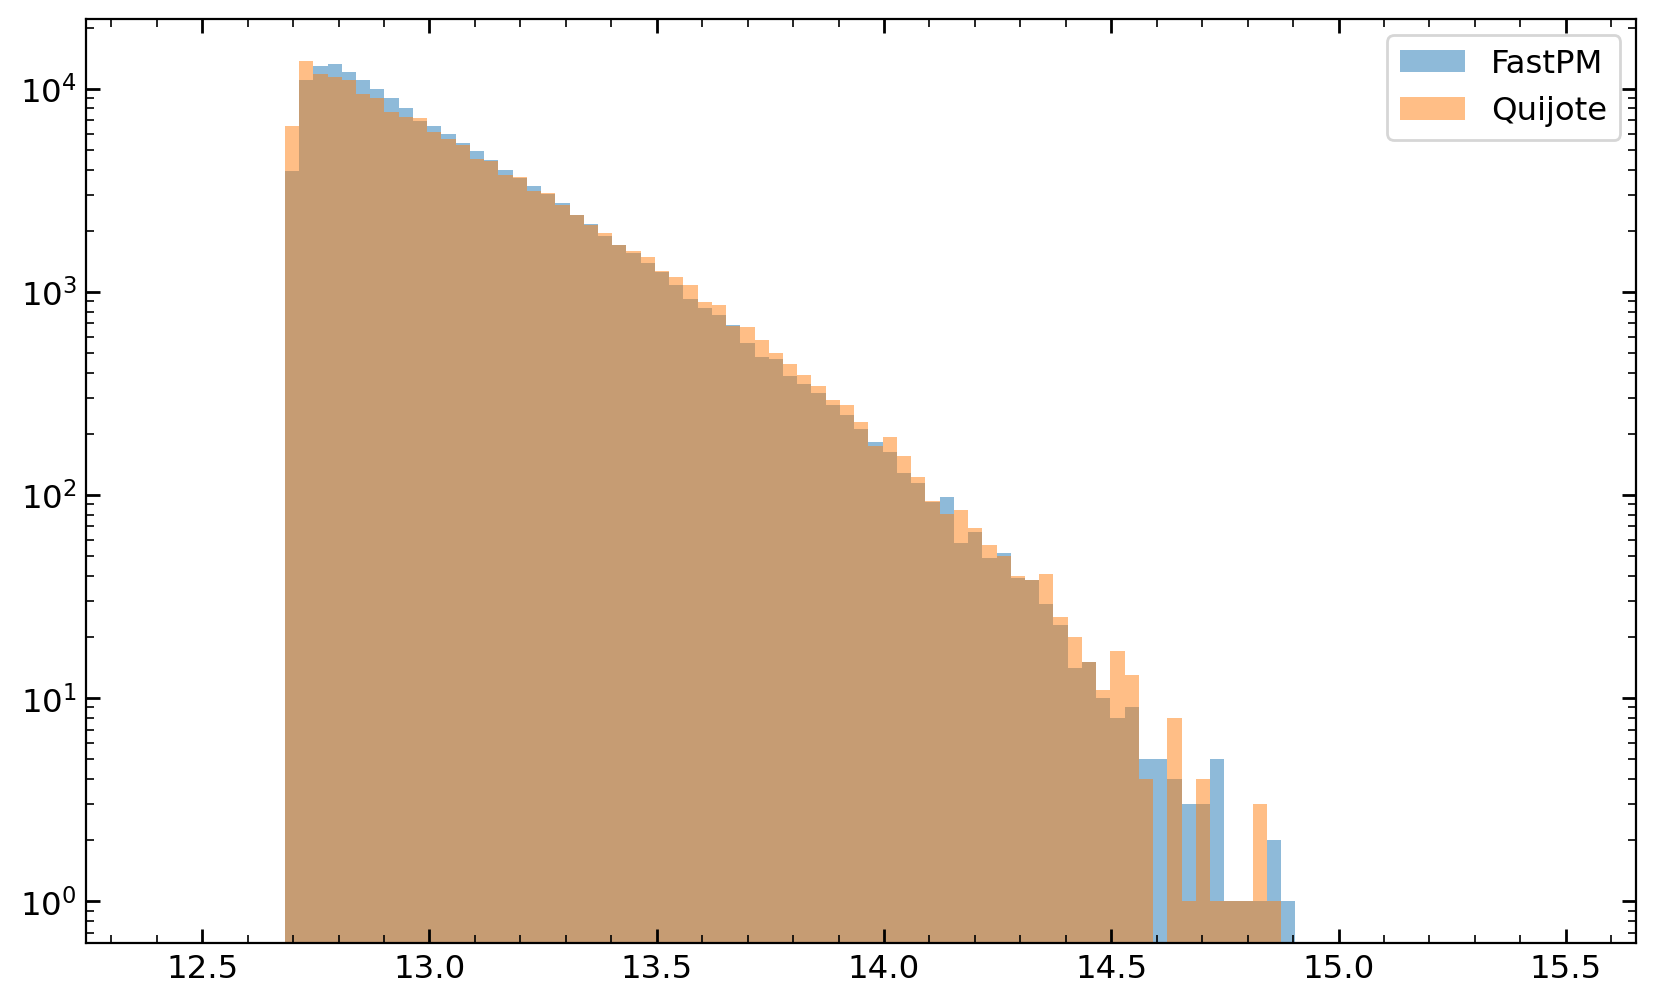

In [33]:
plt.semilogy()
be = np.linspace(12.4, 15.5, 100)
plt.hist(hmass, be, label='FastPM', alpha=0.5)
plt.hist(qmass, be, label='Quijote', alpha=0.5)
plt.legend()

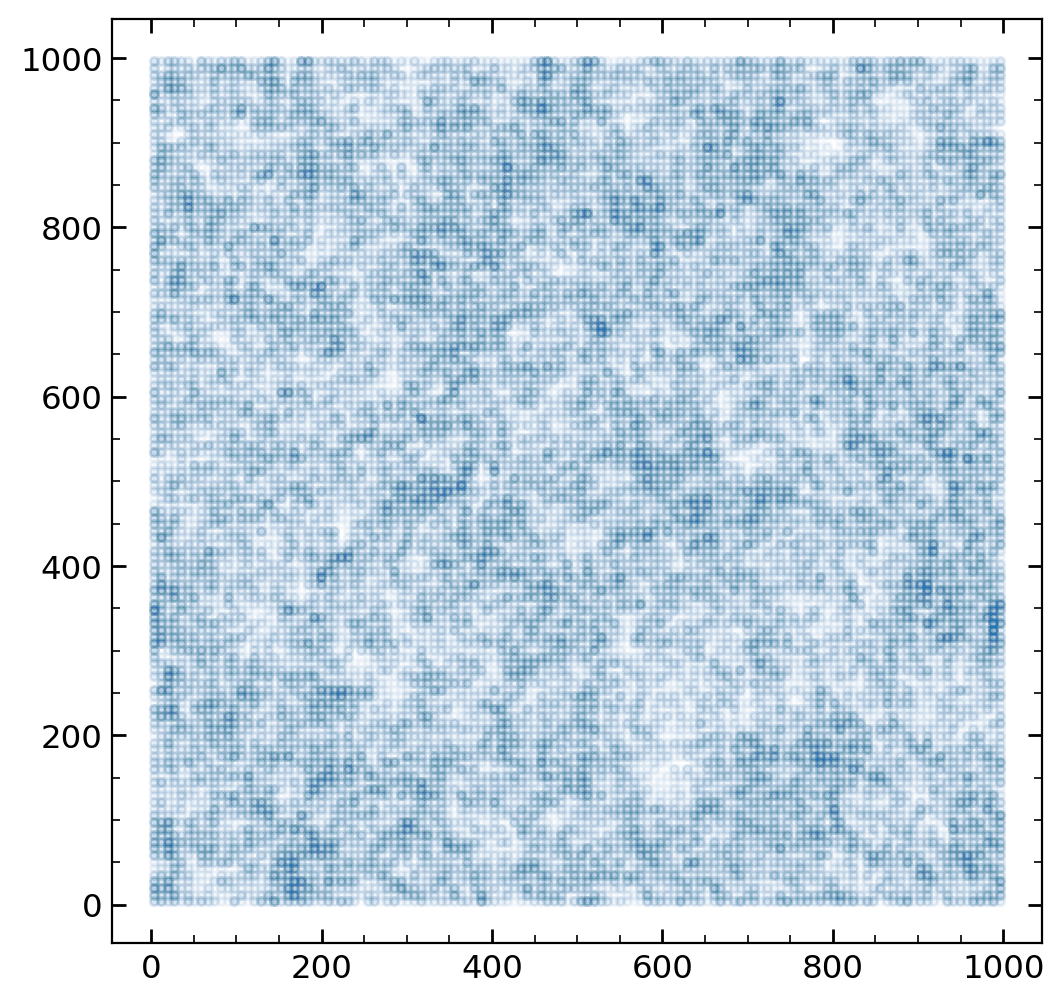

In [34]:
plt.figure(figsize=(6, 6))
plt.plot(hpos[:, 0], hpos[:, 1], '.', alpha=0.01)

In [35]:
# REAL SPACE
import MAS_library as MASL
grid = 128  # the 3D field will have grid x grid x grid voxels
BoxSize = 1000.0  # Mpc/h ; size of box
MAS = 'NGP'  # mass-assigment scheme
verbose = False  # print information on progress

# compute density field
hdelta = np.zeros((grid, grid, grid), dtype=np.float32)
MASL.MA(hpos.astype(np.float32), hdelta, BoxSize, MAS)

qdelta = np.zeros((grid, grid, grid), dtype=np.float32)
MASL.MA(qpos.astype(np.float32), qdelta, BoxSize, MAS)

# normalize
hdelta /= hdelta.mean()
qdelta /= qdelta.mean()
hdelta -= 1
qdelta -= 1

Text(0.5, 1.0, 'Quijote')

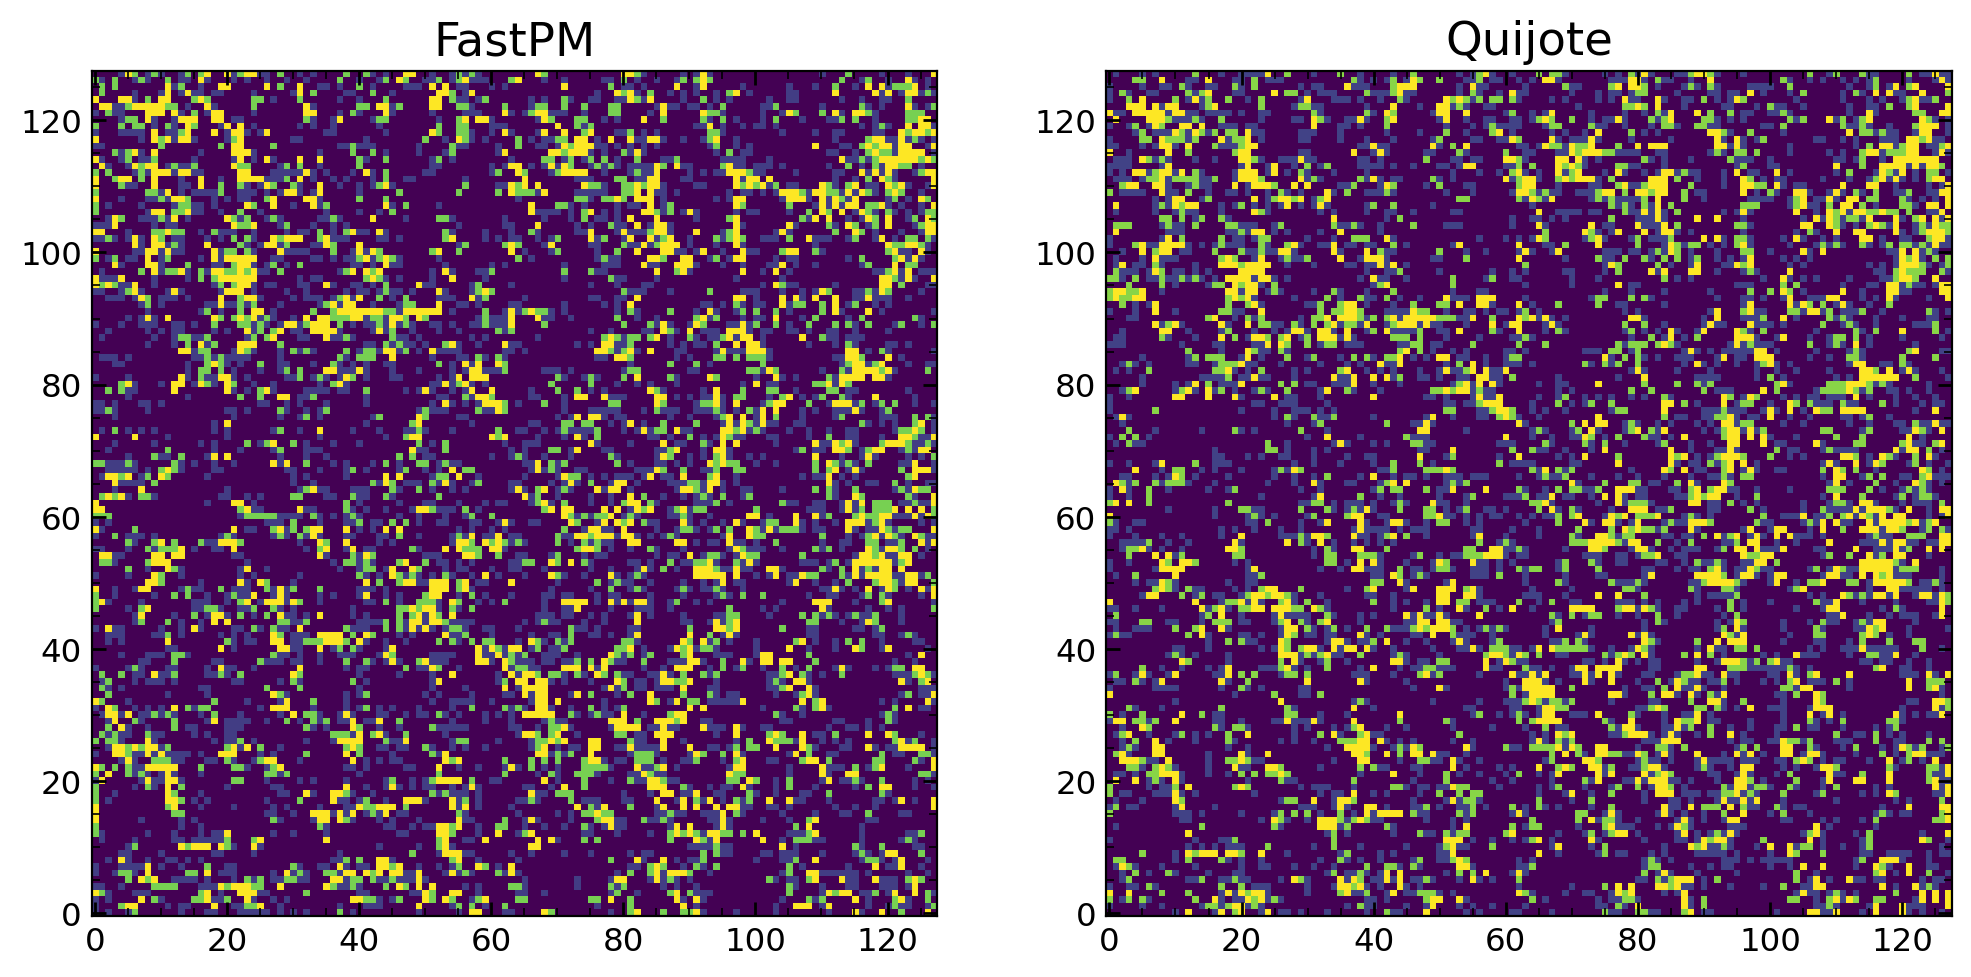

In [36]:
f, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].imshow(hdelta[50:60].sum(axis=0), vmin=-1, vmax=20)
axs[0].set_title('FastPM')
axs[1].imshow(qdelta[50:60].sum(axis=0), vmin=-1, vmax=20)
axs[1].set_title('Quijote')


Computing power spectra of the fields...
Time FFTS = 0.02
Time loop = 0.07
Time taken = 0.09 seconds


Text(0.5, 1.0, 'Hexadecapole')

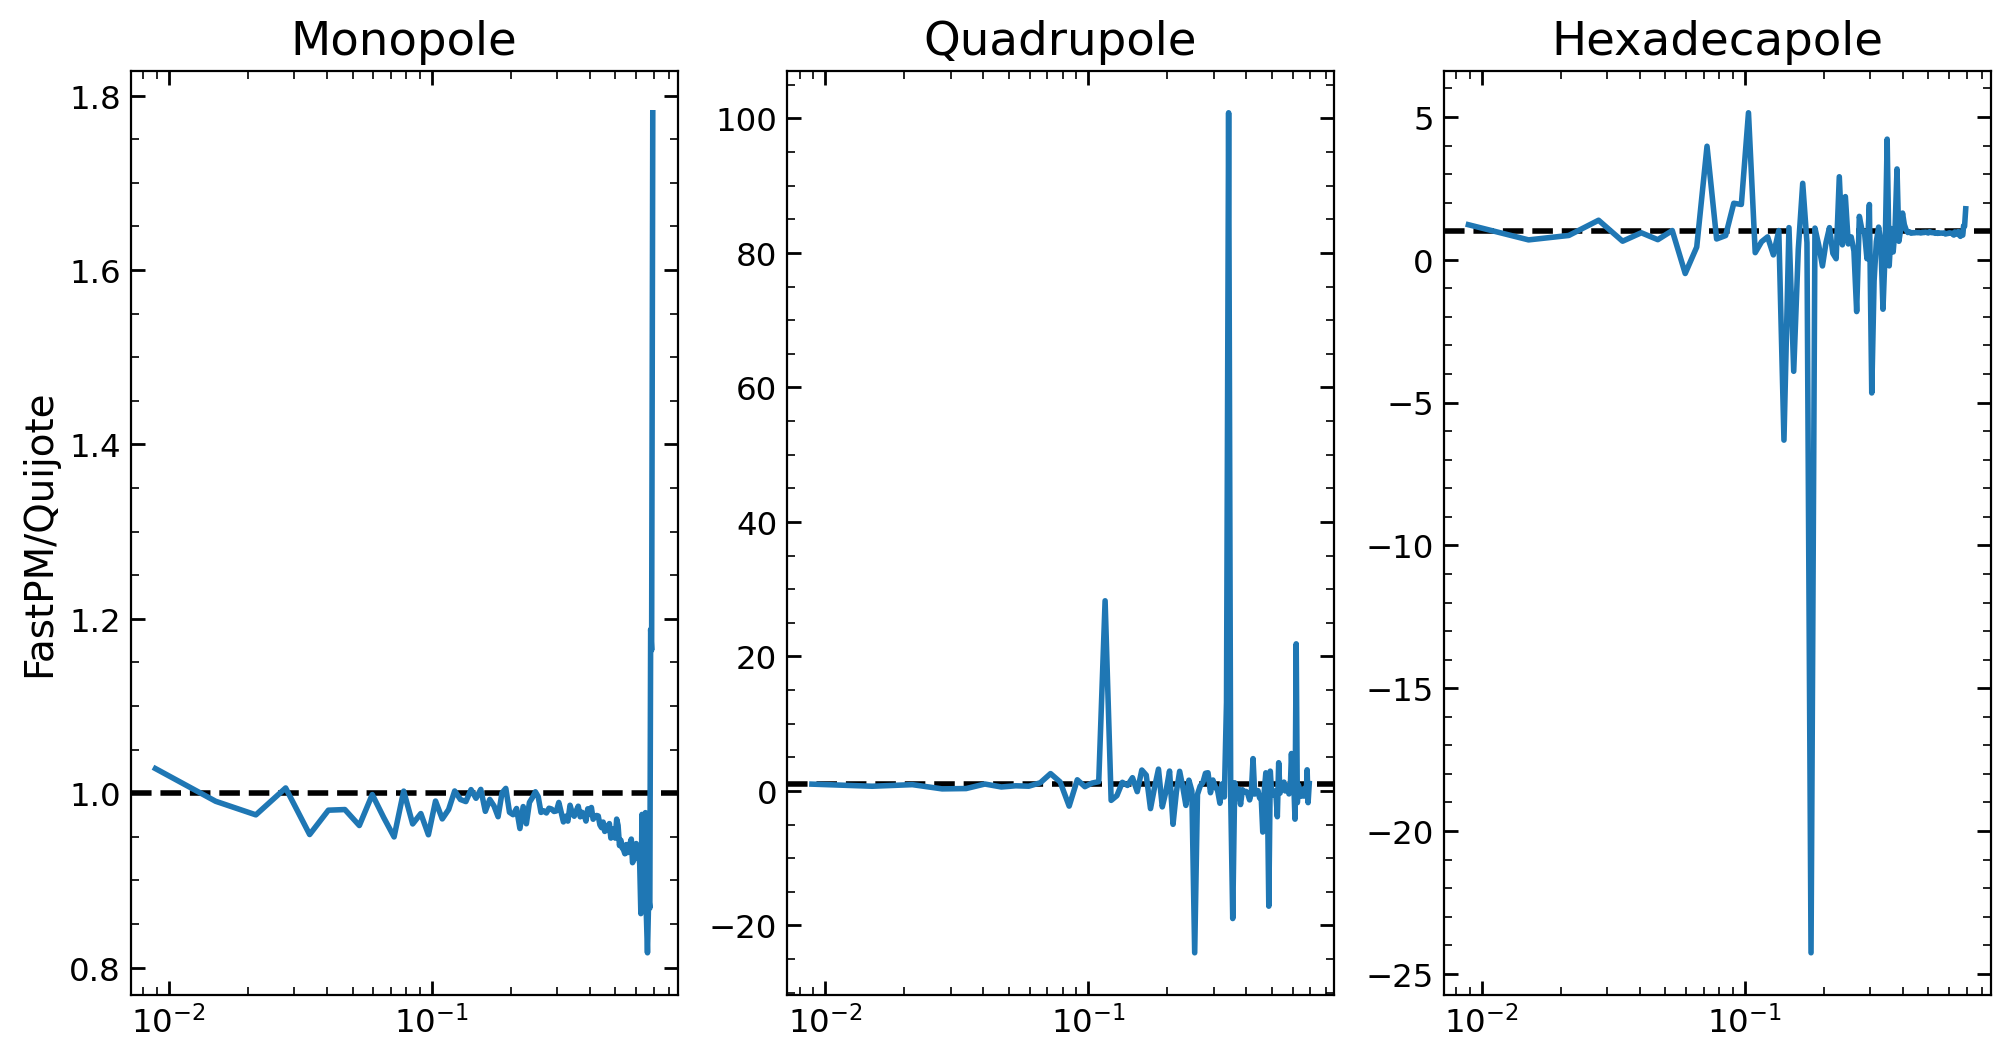

In [37]:
import Pk_library as PKL
Pk = PKL.XPk([hdelta, qdelta], BoxSize, axis=0, MAS='NGP', threads=1)
f, axs = plt.subplots(1, 3, figsize=(12, 6))
axs[0].axhline(1, color='k', ls='--')
axs[0].semilogx(Pk.k3D, Pk.Pk[:, 0, 0]/Pk.Pk[:, 0, 1], label='FastPM/Quijote')
axs[0].set_title('Monopole')
axs[0].set_ylabel('FastPM/Quijote')

axs[1].axhline(1, color='k', ls='--')
axs[1].semilogx(Pk.k3D, Pk.Pk[:, 1, 0]/Pk.Pk[:, 1, 1], label='FastPM/Quijote')
axs[1].set_title('Quadrupole')

axs[2].axhline(1, color='k', ls='--')
axs[2].semilogx(Pk.k3D, Pk.Pk[:, 2, 0]/Pk.Pk[:, 2, 1], label='FastPM/Quijote')
axs[2].set_title('Hexadecapole')

In [38]:
# REDSHIFT SPACE

import redshift_space_library as RSL
from copy import deepcopy
hposz = deepcopy(hpos).astype(np.float32)
qposz = deepcopy(qpos).astype(np.float32)
RSL.pos_redshift_space(hposz, hvel.astype(np.float32),
                       BoxSize, 0.6313, 0.5, axis=0)
RSL.pos_redshift_space(qposz, qvel.astype(np.float32),
                       BoxSize, 0.6313, 0.5, axis=0)

# compute density field
hdeltaz = np.zeros((grid, grid, grid), dtype=np.float32)
MASL.MA(hposz, hdeltaz, BoxSize, MAS)

qdeltaz = np.zeros((grid, grid, grid), dtype=np.float32)
MASL.MA(qposz, qdeltaz, BoxSize, MAS)

# normalize
hdeltaz /= hdeltaz.mean()
qdeltaz /= qdeltaz.mean()
hdeltaz -= 1
qdeltaz -= 1


Computing power spectra of the fields...
Time FFTS = 0.02
Time loop = 0.07
Time taken = 0.09 seconds


Text(0.5, 1.0, 'Hexadecapole')

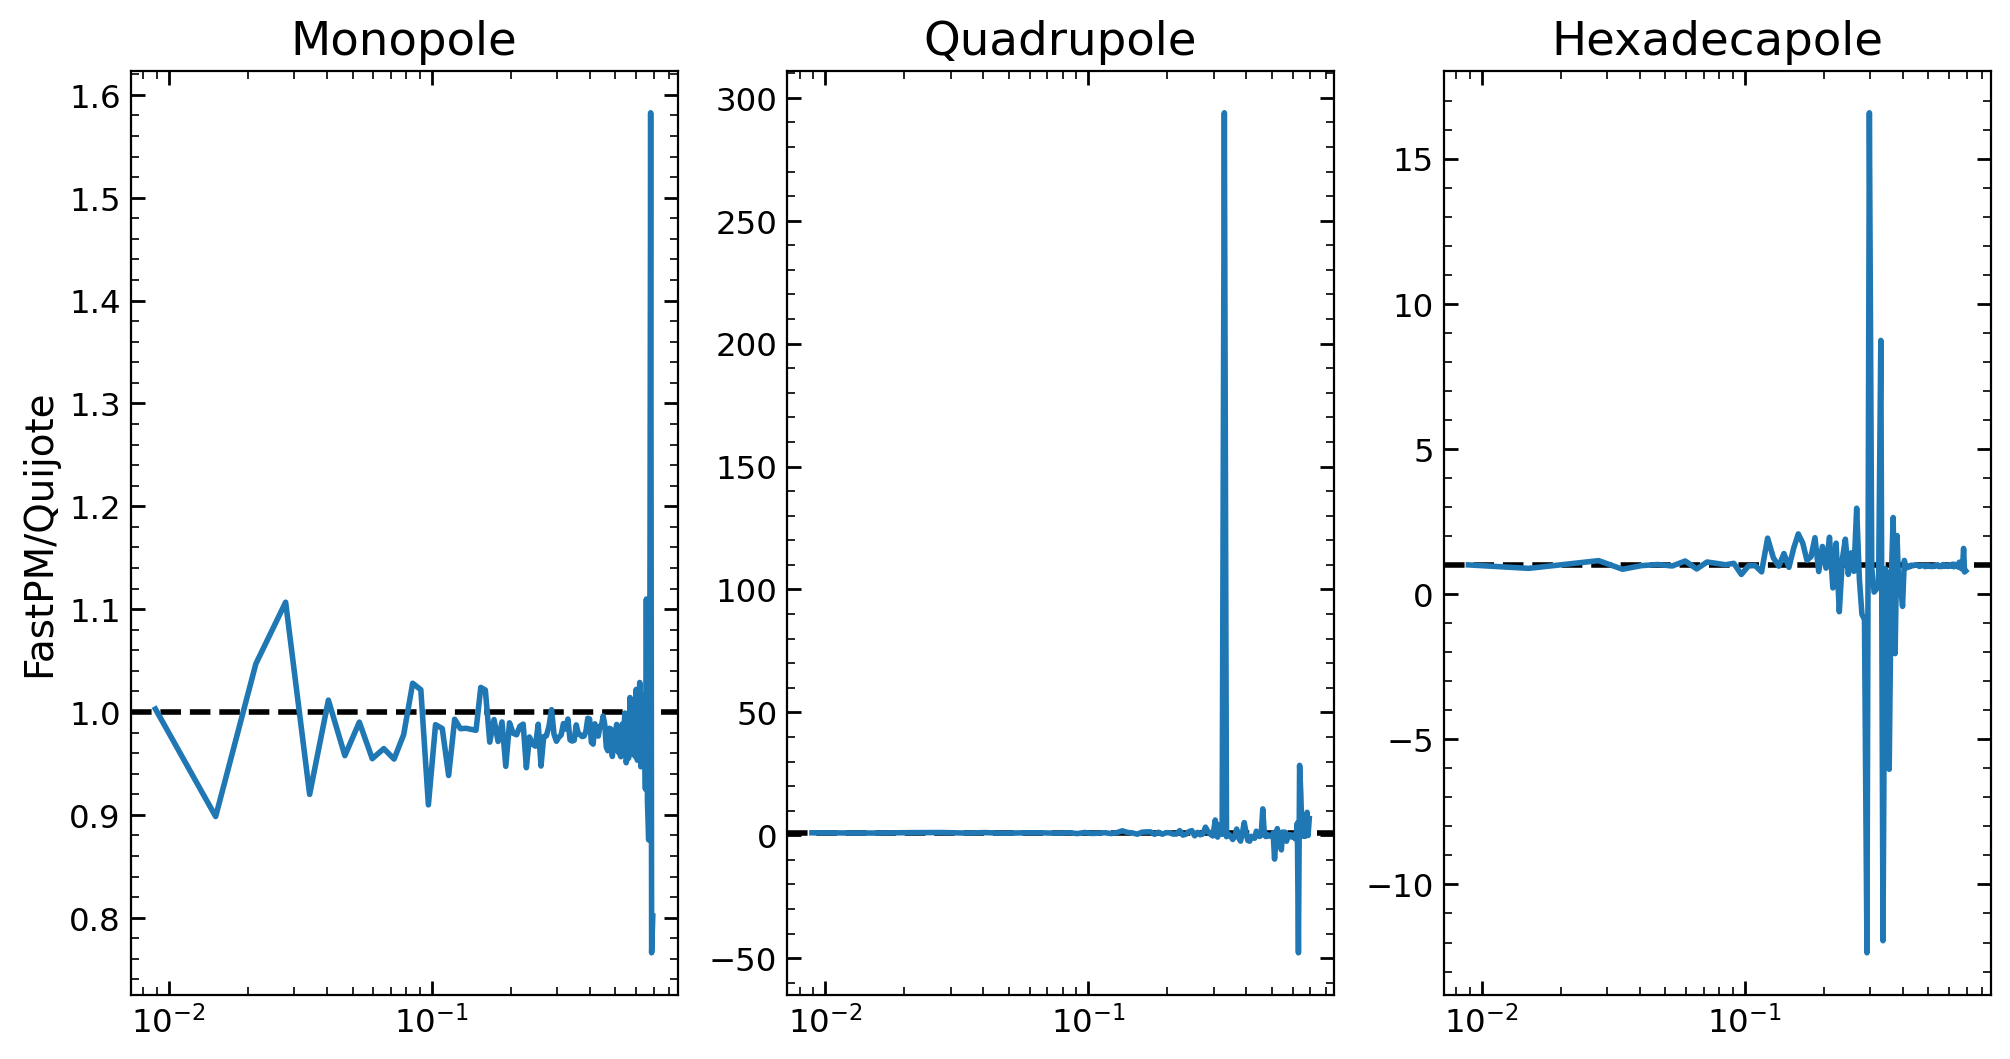

In [39]:
import Pk_library as PKL
Pk = PKL.XPk([hdeltaz, qdeltaz], BoxSize, axis=0, MAS='NGP', threads=1)
f, axs = plt.subplots(1, 3, figsize=(12, 6))
axs[0].axhline(1, color='k', ls='--')
axs[0].semilogx(Pk.k3D, Pk.Pk[:, 0, 0]/Pk.Pk[:, 0, 1], label='FastPM/Quijote')
axs[0].set_title('Monopole')
axs[0].set_ylabel('FastPM/Quijote')

axs[1].axhline(1, color='k', ls='--')
axs[1].semilogx(Pk.k3D, Pk.Pk[:, 1, 0]/Pk.Pk[:, 1, 1], label='FastPM/Quijote')
axs[1].set_title('Quadrupole')

axs[2].axhline(1, color='k', ls='--')
axs[2].semilogx(Pk.k3D, Pk.Pk[:, 2, 0]/Pk.Pk[:, 2, 1], label='FastPM/Quijote')
axs[2].set_title('Hexadecapole')

## Look at Halos (post-processing)

In [133]:
# load fastpm+charm halos
lhid = 99
cdir = wdir+f'quijotelike/fastpm/L1000-N128/{lhid}'
with h5py.File(join(cdir, 'halos.h5'), 'r') as f:
    a = list(f.keys())[-1]
    print(f[a].keys())
    hpos = f[a]['pos'][...]
    hvel = f[a]['vel'][...]
    hmass = f[a]['mass'][...]

<KeysViewHDF5 ['mass', 'pos', 'vel']>


In [134]:
# load quijote halos
cdir = wdir+f'quijote/nbody/L1000-N128/{lhid}'
with h5py.File(join(cdir, 'halos.h5'), 'r') as f:
    a = list(f.keys())[-1]
    print(f[a].keys())
    qpos = f[a]['pos'][...]
    qvel = f[a]['vel'][...]
    qmass = f[a]['mass'][...]

<KeysViewHDF5 ['mass', 'pos', 'vel']>


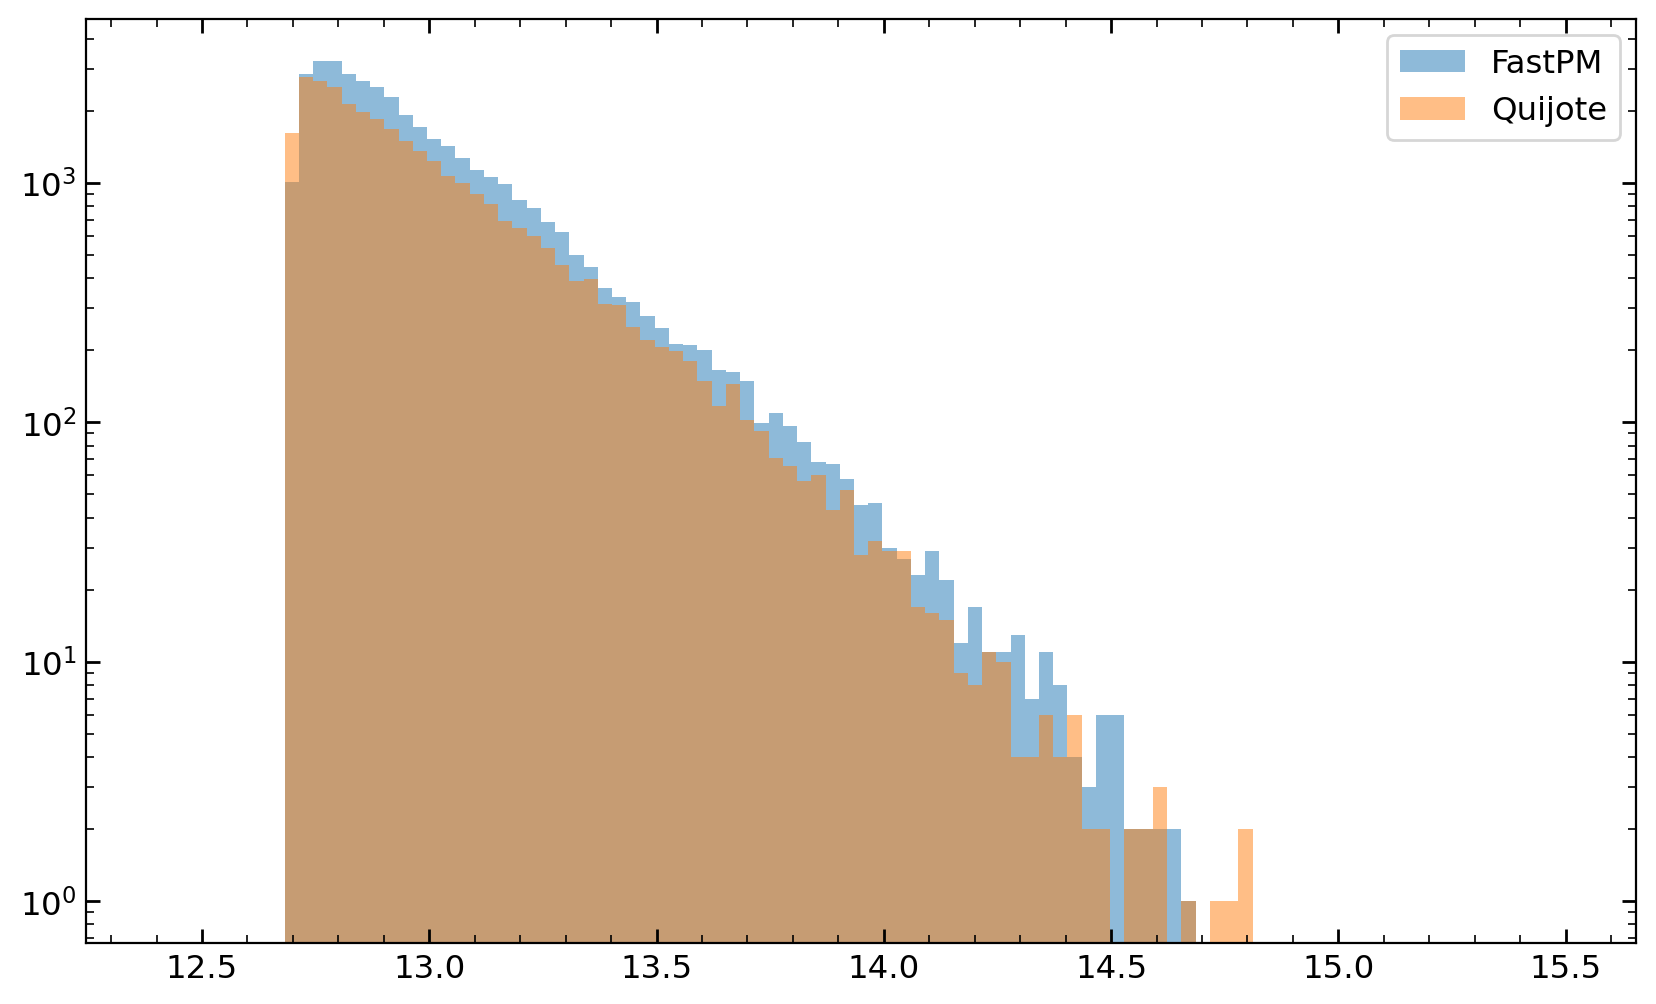

In [135]:
plt.semilogy()
be = np.linspace(12.4, 15.5, 100)
plt.hist(hmass, be, label='FastPM', alpha=0.5)
plt.hist(qmass, be, label='Quijote', alpha=0.5)
plt.legend()

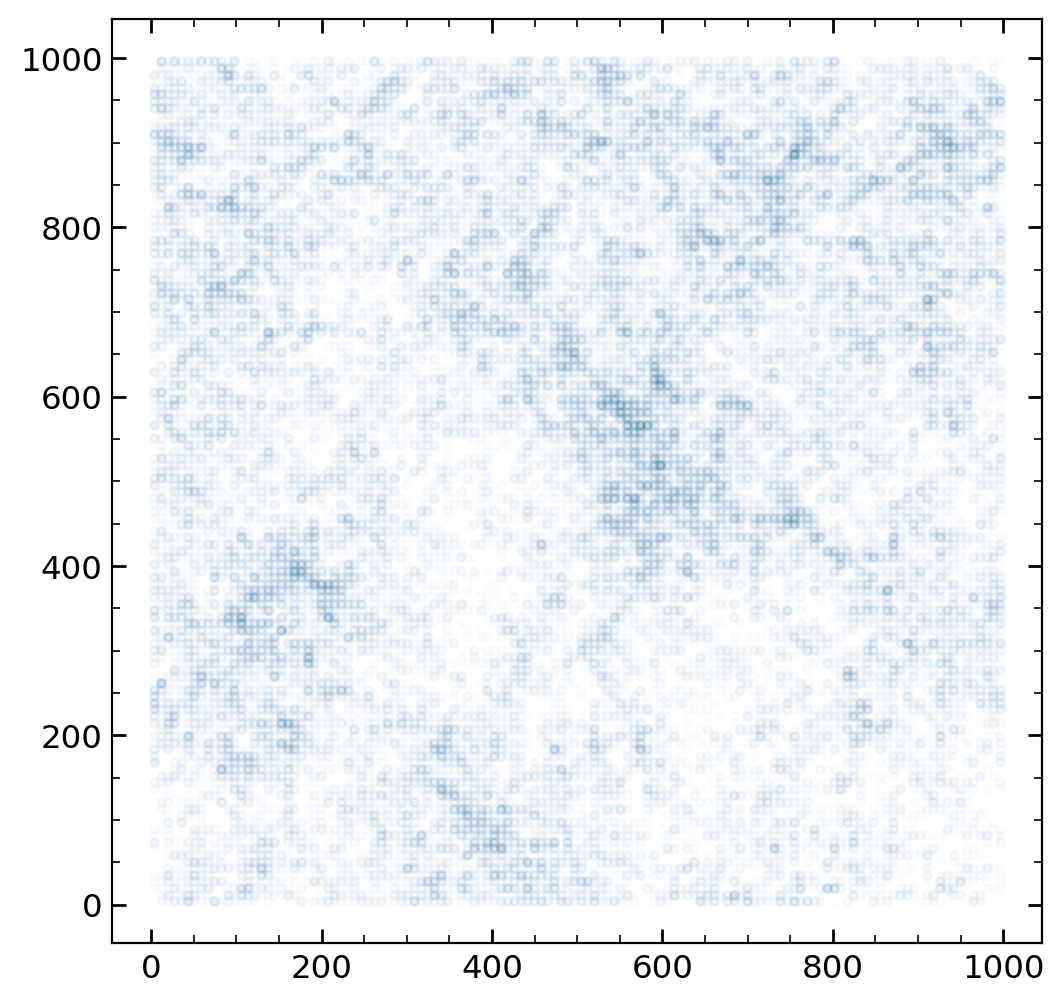

In [136]:
plt.figure(figsize=(6, 6))
plt.plot(hpos[:, 0], hpos[:, 1], '.', alpha=0.01)

In [137]:
# REAL SPACE
import MAS_library as MASL
grid = 128  # the 3D field will have grid x grid x grid voxels
BoxSize = 1000.0  # Mpc/h ; size of box
MAS = 'NGP'  # mass-assigment scheme
verbose = False  # print information on progress

# compute density field
hdelta = np.zeros((grid, grid, grid), dtype=np.float32)
MASL.MA(hpos.astype(np.float32), hdelta, BoxSize, MAS)

qdelta = np.zeros((grid, grid, grid), dtype=np.float32)
MASL.MA(qpos.astype(np.float32), qdelta, BoxSize, MAS)

# normalize
hdelta /= hdelta.mean()
qdelta /= qdelta.mean()
hdelta -= 1
qdelta -= 1

Text(0.5, 1.0, 'Quijote')

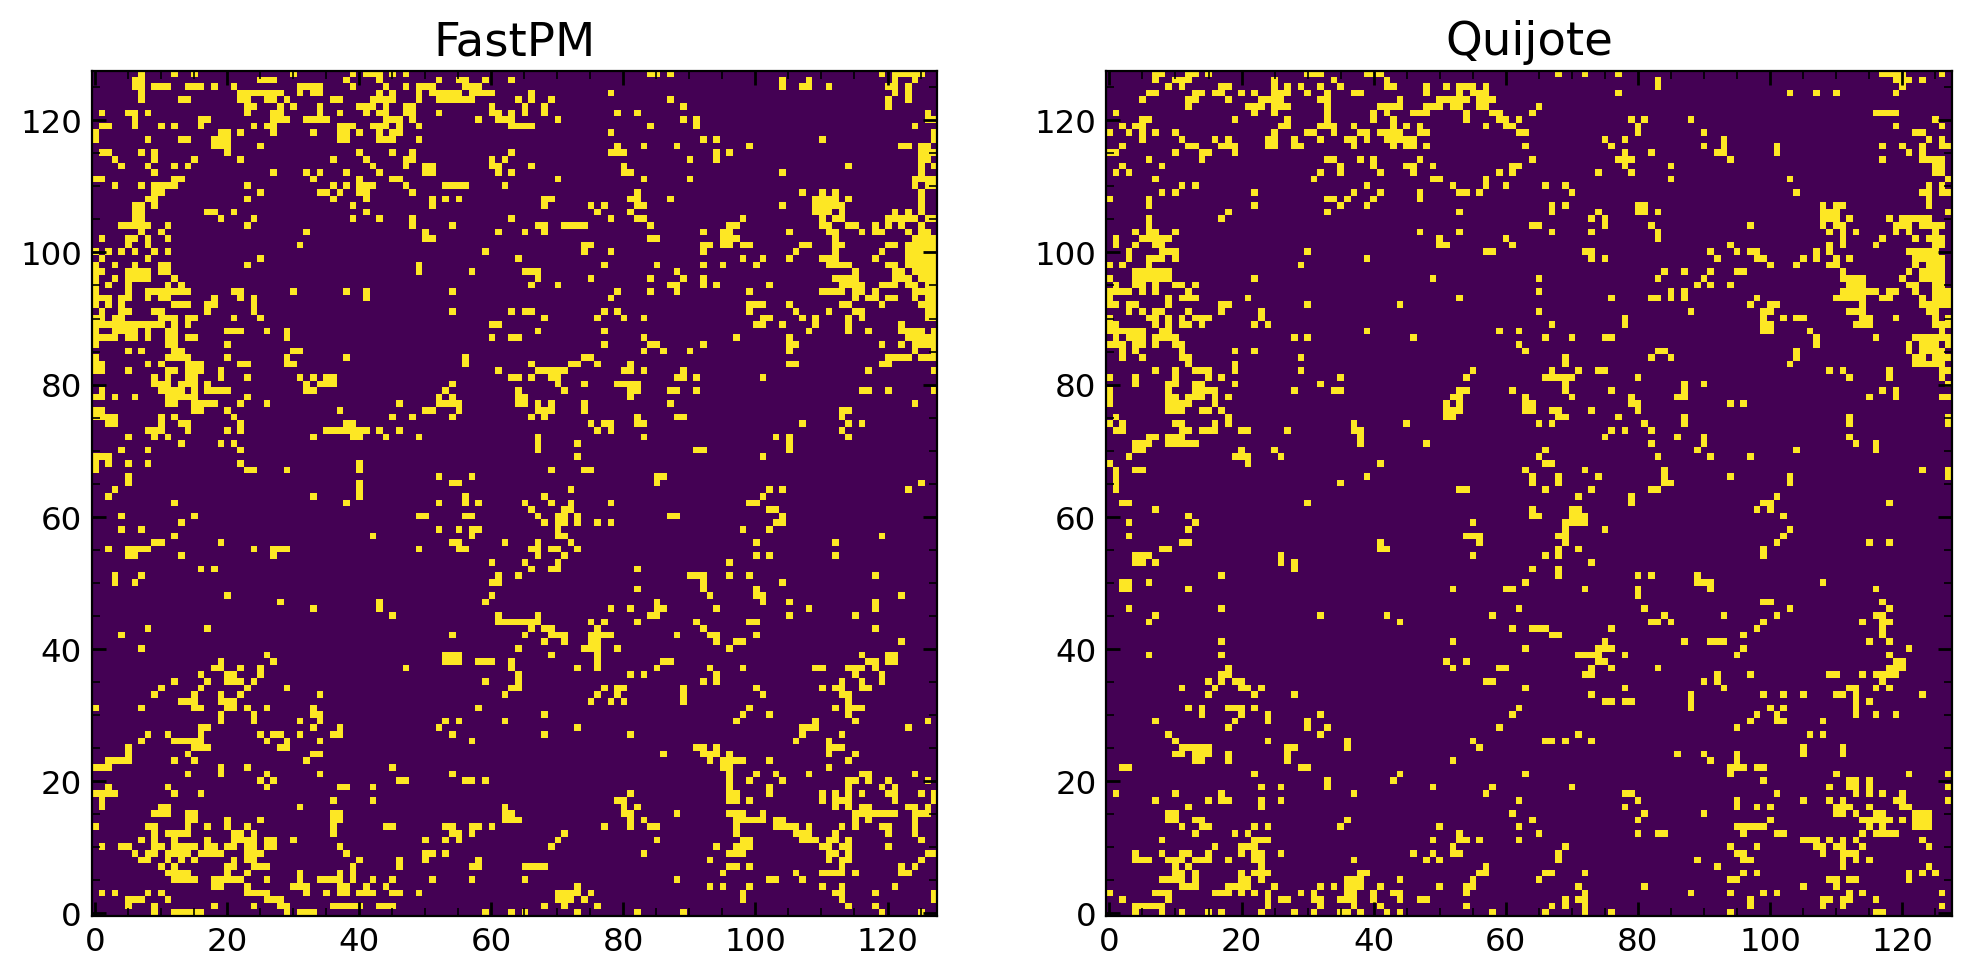

In [138]:
f, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].imshow(hdelta[50:60].sum(axis=0), vmin=-1, vmax=20)
axs[0].set_title('FastPM')
axs[1].imshow(qdelta[50:60].sum(axis=0), vmin=-1, vmax=20)
axs[1].set_title('Quijote')


Computing power spectra of the fields...
Time FFTS = 0.02
Time loop = 0.07
Time taken = 0.09 seconds


Text(0.5, 1.0, 'Hexadecapole')

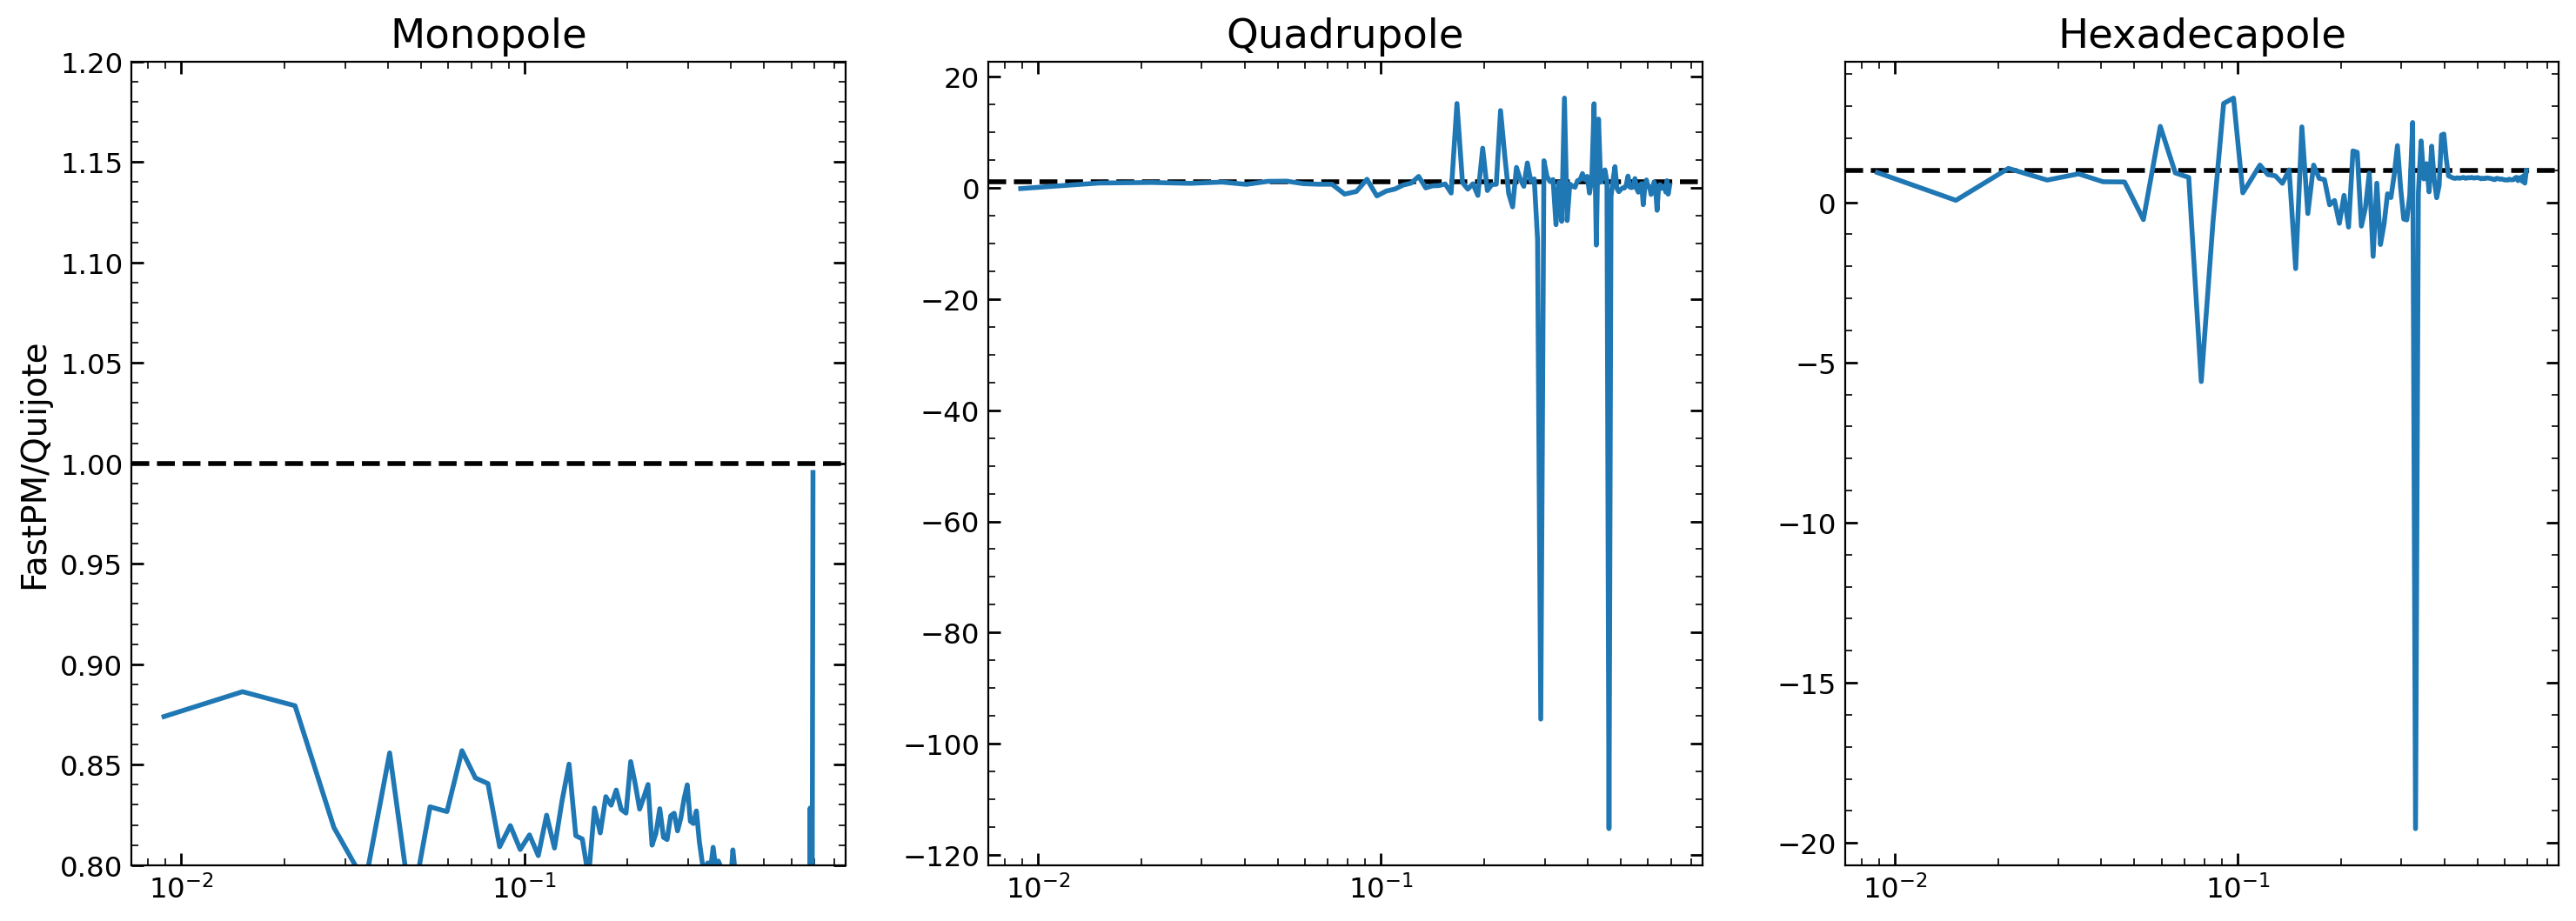

In [139]:
import Pk_library as PKL
Pk = PKL.XPk([hdelta, qdelta], BoxSize, axis=0, MAS='NGP', threads=1)
f, axs = plt.subplots(1, 3, figsize=(18, 6))
axs[0].axhline(1, color='k', ls='--')
axs[0].semilogx(Pk.k3D, Pk.Pk[:, 0, 0]/Pk.Pk[:, 0, 1], label='FastPM/Quijote')
axs[0].set_title('Monopole')
axs[0].set_ylabel('FastPM/Quijote')
axs[0].set_ylim(0.8, 1.2)

axs[1].axhline(1, color='k', ls='--')
axs[1].semilogx(Pk.k3D, Pk.Pk[:, 1, 0]/Pk.Pk[:, 1, 1], label='FastPM/Quijote')
axs[1].set_title('Quadrupole')
# axs[1].set_ylim(0.5, 2)

axs[2].axhline(1, color='k', ls='--')
axs[2].semilogx(Pk.k3D, Pk.Pk[:, 2, 0]/Pk.Pk[:, 2, 1], label='FastPM/Quijote')
axs[2].set_title('Hexadecapole')
# axs[2].set_ylim(0.5, 1.5)

In [140]:
# REDSHIFT SPACE

import redshift_space_library as RSL
from copy import deepcopy
hposz = deepcopy(hpos).astype(np.float32)
qposz = deepcopy(qpos).astype(np.float32)
RSL.pos_redshift_space(hposz, hvel.astype(np.float32),
                       BoxSize, 0.6313, 0.5, axis=0)
RSL.pos_redshift_space(qposz, qvel.astype(np.float32),
                       BoxSize, 0.6313, 0.5, axis=0)

# compute density field
hdeltaz = np.zeros((grid, grid, grid), dtype=np.float32)
MASL.MA(hposz, hdeltaz, BoxSize, MAS)

qdeltaz = np.zeros((grid, grid, grid), dtype=np.float32)
MASL.MA(qposz, qdeltaz, BoxSize, MAS)

# normalize
hdeltaz /= hdeltaz.mean()
qdeltaz /= qdeltaz.mean()
hdeltaz -= 1
qdeltaz -= 1


Computing power spectra of the fields...
Time FFTS = 0.03
Time loop = 0.07
Time taken = 0.10 seconds


Text(0.5, 1.0, 'Hexadecapole')

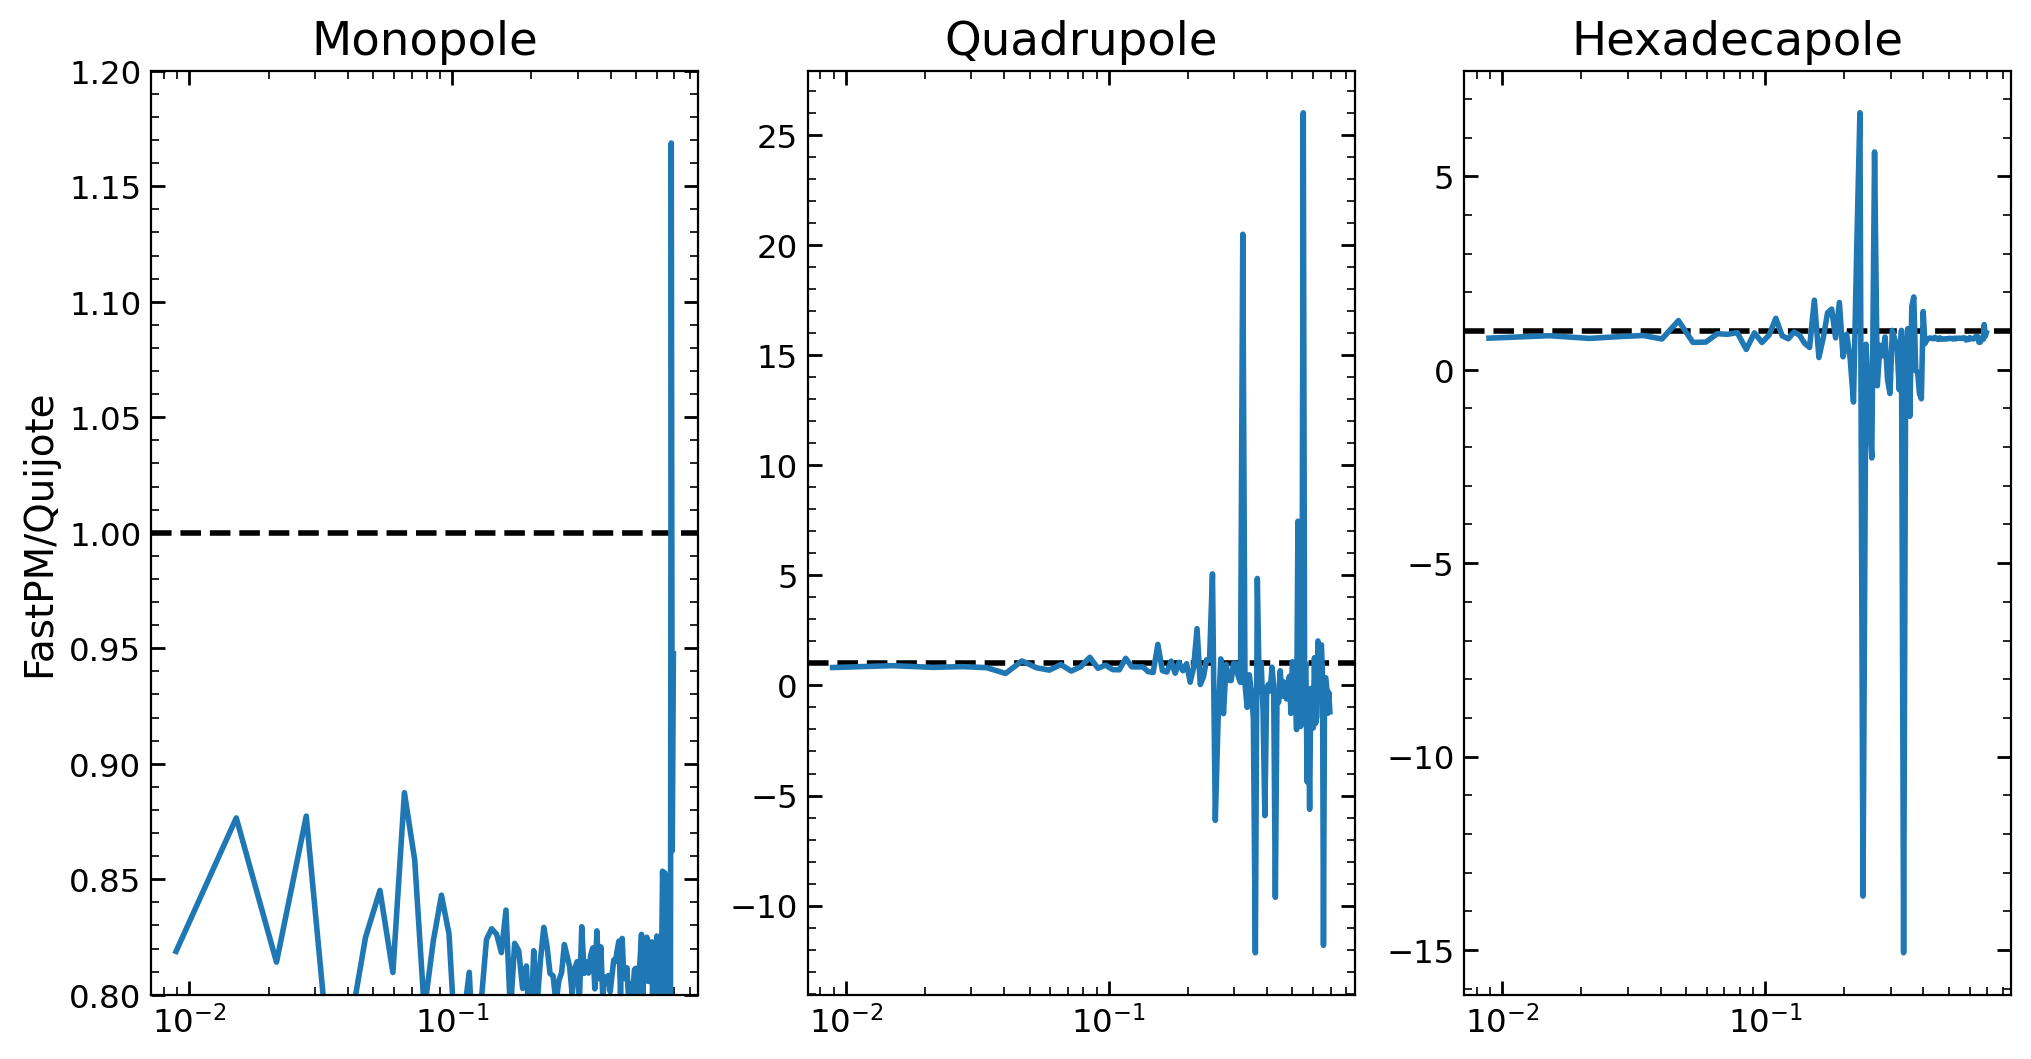

In [141]:
import Pk_library as PKL
Pk = PKL.XPk([hdeltaz, qdeltaz], BoxSize, axis=0, MAS='NGP', threads=1)
f, axs = plt.subplots(1, 3, figsize=(12, 6))
axs[0].axhline(1, color='k', ls='--')
axs[0].semilogx(Pk.k3D, Pk.Pk[:, 0, 0]/Pk.Pk[:, 0, 1], label='FastPM/Quijote')
axs[0].set_title('Monopole')
axs[0].set_ylabel('FastPM/Quijote')
axs[0].set_ylim(0.8, 1.2)

axs[1].axhline(1, color='k', ls='--')
axs[1].semilogx(Pk.k3D, Pk.Pk[:, 1, 0]/Pk.Pk[:, 1, 1], label='FastPM/Quijote')
axs[1].set_title('Quadrupole')

axs[2].axhline(1, color='k', ls='--')
axs[2].semilogx(Pk.k3D, Pk.Pk[:, 2, 0]/Pk.Pk[:, 2, 1], label='FastPM/Quijote')
axs[2].set_title('Hexadecapole')

## Load all

In [176]:
from tqdm import tqdm
# load quijote halos, convert comoving velocities to physical
for lhid in tqdm(range(2000)):
    cdir = wdir+f'quijote/nbody/L1000-N128/{lhid}'
    with h5py.File(join(cdir, 'halos.h5'), 'r') as f:
        a = list(f.keys())[-1]
        qvel = f[a]['vel'][...]/(1+0.5)

    with h5py.File(join(cdir, 'halos.h5'), 'r+') as f:
        f[a]['vel'][...] = qvel

100%|██████████| 2000/2000 [01:04<00:00, 31.12it/s] 


In [177]:

from cmass.infer.loaders import get_cosmo
from cmass.utils import cosmo_to_astropy

count = [0, 0]
hists, Pks, zPks = [], [], []
for lhid in tqdm(range(0, 100)):
    # load fastpm+charm halos
    cdir = wdir+f'quijotelike/fastpm/L1000-N128/{lhid}'
    cosmo = get_cosmo(cdir)
    cosmo = cosmo_to_astropy(cosmo)

    with h5py.File(join(cdir, 'halos.h5'), 'r') as f:
        a = list(f.keys())[-1]
        hpos = f[a]['pos'][...]
        hvel = f[a]['vel'][...]
        hmass = f[a]['mass'][...]

    # load quijote halos
    cdir = wdir+f'quijote/nbody/L1000-N128/{lhid}'
    with h5py.File(join(cdir, 'halos.h5'), 'r') as f:
        a = list(f.keys())[-1]
        qpos = f[a]['pos'][...]
        qvel = f[a]['vel'][...]
        qmass = f[a]['mass'][...]

    # only keep the top Ncut halos
    Ncut = 90_000
    if len(hmass) > Ncut:
        mask = hmass > np.sort(hmass)[-Ncut]
        hmass = hmass[mask]
        hpos = hpos[mask]
        hvel = hvel[mask]
    else:
        count[0] += 1

    if len(qmass) > Ncut:
        mask = qmass > np.sort(qmass)[-Ncut]
        qmass = qmass[mask]
        qpos = qpos[mask]
        qvel = qvel[mask]
    else:
        count[1] += 1

    # HMF
    h1 = np.histogram(hmass, bins=100, range=(12.4, 15.3))
    h2 = np.histogram(qmass, bins=100, range=(12.4, 15.3))
    hists.append([h1[0]/h2[0]])

    # REAL SPACE
    import MAS_library as MASL
    grid = 128  # the 3D field will have grid x grid x grid voxels
    BoxSize = 1000.0  # Mpc/h ; size of box
    MAS = 'NGP'  # mass-assigment scheme
    verbose = False  # print information on progress

    # noise
    hpos += (1000/128)/np.sqrt(3)*np.random.randn(*hpos.shape)
    qpos += (1000/128)/np.sqrt(3)*np.random.randn(*qpos.shape)

    # wrap
    hpos = hpos % BoxSize
    qpos = qpos % BoxSize

    # compute density field
    hdelta = np.zeros((grid, grid, grid), dtype=np.float32)
    MASL.MA(hpos.astype(np.float32), hdelta, BoxSize, MAS)

    qdelta = np.zeros((grid, grid, grid), dtype=np.float32)
    MASL.MA(qpos.astype(np.float32), qdelta, BoxSize, MAS)

    # normalize
    hdelta /= hdelta.mean()
    qdelta /= qdelta.mean()
    hdelta -= 1
    qdelta -= 1

    # Calculate P(k)
    Pk = PKL.XPk([hdelta, qdelta], BoxSize, axis=0, MAS='NGP', threads=1)
    Pks.append(Pk.Pk[:, :, 0]/Pk.Pk[:, :, 1])

    # REDSHIFT SPACE
    import redshift_space_library as RSL
    from copy import deepcopy
    zsnap = 0.5
    hposz = deepcopy(hpos).astype(np.float32)
    qposz = deepcopy(qpos).astype(np.float32)
    RSL.pos_redshift_space(hposz, hvel.astype(np.float32),
                           BoxSize, cosmo.H(zsnap).value/cosmo.h, zsnap, axis=0)
    RSL.pos_redshift_space(qposz, qvel.astype(np.float32),
                           BoxSize, cosmo.H(zsnap).value/cosmo.h, zsnap, axis=0)

    # # noise
    # hposz += (1000/128)/np.sqrt(3)*np.random.randn(*hposz.shape)
    # qposz += (1000/128)/np.sqrt(3)*np.random.randn(*qposz.shape)

    # wrap
    hposz = hposz % BoxSize
    qposz = qposz % BoxSize

    # compute density field
    hdeltaz = np.zeros((grid, grid, grid), dtype=np.float32)
    MASL.MA(hposz, hdeltaz, BoxSize, MAS)

    qdeltaz = np.zeros((grid, grid, grid), dtype=np.float32)
    MASL.MA(qposz, qdeltaz, BoxSize, MAS)

    # normalize
    hdeltaz /= hdeltaz.mean()
    qdeltaz /= qdeltaz.mean()
    hdeltaz -= 1
    qdeltaz -= 1

    # Calculate P(k)
    Pk = PKL.XPk([hdeltaz, qdeltaz], BoxSize, axis=0, MAS=MAS, threads=1)
    zPks.append(Pk.Pk[:, :, 0]/Pk.Pk[:, :, 1])

  0%|          | 0/100 [00:00<?, ?it/s]/tmp/ipykernel_3701933/1005980914.py:47: RuntimeWarning: divide by zero encountered in divide
  hists.append([h1[0]/h2[0]])
/tmp/ipykernel_3701933/1005980914.py:47: RuntimeWarning: invalid value encountered in divide
  hists.append([h1[0]/h2[0]])
  1%|          | 1/100 [00:00<00:26,  3.74it/s]


Computing power spectra of the fields...
Time FFTS = 0.01
Time loop = 0.07
Time taken = 0.09 seconds

Computing power spectra of the fields...
Time FFTS = 0.02
Time loop = 0.07
Time taken = 0.09 seconds


  2%|▏         | 2/100 [00:00<00:31,  3.16it/s]


Computing power spectra of the fields...
Time FFTS = 0.01
Time loop = 0.07
Time taken = 0.09 seconds

Computing power spectra of the fields...
Time FFTS = 0.01
Time loop = 0.07
Time taken = 0.08 seconds


  3%|▎         | 3/100 [00:00<00:29,  3.25it/s]


Computing power spectra of the fields...
Time FFTS = 0.02
Time loop = 0.07
Time taken = 0.09 seconds

Computing power spectra of the fields...
Time FFTS = 0.02
Time loop = 0.07
Time taken = 0.09 seconds


  4%|▍         | 4/100 [00:01<00:31,  3.07it/s]


Computing power spectra of the fields...
Time FFTS = 0.02
Time loop = 0.07
Time taken = 0.09 seconds

Computing power spectra of the fields...
Time FFTS = 0.01
Time loop = 0.07
Time taken = 0.08 seconds


  5%|▌         | 5/100 [00:01<00:30,  3.14it/s]


Computing power spectra of the fields...
Time FFTS = 0.01
Time loop = 0.07
Time taken = 0.09 seconds

Computing power spectra of the fields...
Time FFTS = 0.01
Time loop = 0.07
Time taken = 0.08 seconds


  6%|▌         | 6/100 [00:01<00:32,  2.89it/s]


Computing power spectra of the fields...
Time FFTS = 0.01
Time loop = 0.07
Time taken = 0.08 seconds

Computing power spectra of the fields...
Time FFTS = 0.01
Time loop = 0.07
Time taken = 0.08 seconds


  7%|▋         | 7/100 [00:02<00:32,  2.88it/s]


Computing power spectra of the fields...
Time FFTS = 0.01
Time loop = 0.07
Time taken = 0.08 seconds

Computing power spectra of the fields...
Time FFTS = 0.01
Time loop = 0.07
Time taken = 0.08 seconds


  8%|▊         | 8/100 [00:02<00:30,  3.00it/s]


Computing power spectra of the fields...
Time FFTS = 0.02
Time loop = 0.07
Time taken = 0.09 seconds

Computing power spectra of the fields...
Time FFTS = 0.02
Time loop = 0.07
Time taken = 0.09 seconds


  9%|▉         | 9/100 [00:02<00:31,  2.91it/s]


Computing power spectra of the fields...
Time FFTS = 0.01
Time loop = 0.07
Time taken = 0.08 seconds

Computing power spectra of the fields...
Time FFTS = 0.02
Time loop = 0.07
Time taken = 0.09 seconds


 10%|█         | 10/100 [00:03<00:31,  2.88it/s]


Computing power spectra of the fields...
Time FFTS = 0.02
Time loop = 0.07
Time taken = 0.09 seconds

Computing power spectra of the fields...
Time FFTS = 0.01
Time loop = 0.07
Time taken = 0.08 seconds


 11%|█         | 11/100 [00:03<00:29,  3.00it/s]


Computing power spectra of the fields...
Time FFTS = 0.02
Time loop = 0.07
Time taken = 0.09 seconds

Computing power spectra of the fields...
Time FFTS = 0.01
Time loop = 0.07
Time taken = 0.08 seconds


 12%|█▏        | 12/100 [00:04<00:32,  2.75it/s]


Computing power spectra of the fields...
Time FFTS = 0.01
Time loop = 0.07
Time taken = 0.09 seconds

Computing power spectra of the fields...
Time FFTS = 0.01
Time loop = 0.07
Time taken = 0.08 seconds


 13%|█▎        | 13/100 [00:04<00:30,  2.89it/s]


Computing power spectra of the fields...
Time FFTS = 0.01
Time loop = 0.07
Time taken = 0.09 seconds

Computing power spectra of the fields...
Time FFTS = 0.01
Time loop = 0.07
Time taken = 0.08 seconds


 14%|█▍        | 14/100 [00:04<00:30,  2.78it/s]


Computing power spectra of the fields...
Time FFTS = 0.01
Time loop = 0.07
Time taken = 0.09 seconds

Computing power spectra of the fields...
Time FFTS = 0.01
Time loop = 0.07
Time taken = 0.08 seconds


 15%|█▌        | 15/100 [00:05<00:28,  2.99it/s]


Computing power spectra of the fields...
Time FFTS = 0.01
Time loop = 0.07
Time taken = 0.09 seconds

Computing power spectra of the fields...
Time FFTS = 0.01
Time loop = 0.07
Time taken = 0.09 seconds


 16%|█▌        | 16/100 [00:05<00:29,  2.81it/s]


Computing power spectra of the fields...
Time FFTS = 0.02
Time loop = 0.07
Time taken = 0.09 seconds

Computing power spectra of the fields...
Time FFTS = 0.01
Time loop = 0.07
Time taken = 0.09 seconds


 17%|█▋        | 17/100 [00:05<00:30,  2.75it/s]


Computing power spectra of the fields...
Time FFTS = 0.01
Time loop = 0.07
Time taken = 0.09 seconds

Computing power spectra of the fields...
Time FFTS = 0.01
Time loop = 0.07
Time taken = 0.08 seconds


 18%|█▊        | 18/100 [00:06<00:29,  2.82it/s]


Computing power spectra of the fields...
Time FFTS = 0.02
Time loop = 0.07
Time taken = 0.09 seconds

Computing power spectra of the fields...
Time FFTS = 0.01
Time loop = 0.07
Time taken = 0.08 seconds


 19%|█▉        | 19/100 [00:06<00:27,  2.97it/s]


Computing power spectra of the fields...
Time FFTS = 0.01
Time loop = 0.07
Time taken = 0.08 seconds

Computing power spectra of the fields...
Time FFTS = 0.01
Time loop = 0.07
Time taken = 0.09 seconds


 20%|██        | 20/100 [00:06<00:26,  2.97it/s]


Computing power spectra of the fields...
Time FFTS = 0.01
Time loop = 0.07
Time taken = 0.09 seconds

Computing power spectra of the fields...
Time FFTS = 0.01
Time loop = 0.07
Time taken = 0.08 seconds


 21%|██        | 21/100 [00:07<00:28,  2.79it/s]


Computing power spectra of the fields...
Time FFTS = 0.02
Time loop = 0.07
Time taken = 0.09 seconds

Computing power spectra of the fields...
Time FFTS = 0.02
Time loop = 0.07
Time taken = 0.09 seconds


 22%|██▏       | 22/100 [00:07<00:26,  2.89it/s]


Computing power spectra of the fields...
Time FFTS = 0.02
Time loop = 0.07
Time taken = 0.09 seconds

Computing power spectra of the fields...
Time FFTS = 0.01
Time loop = 0.07
Time taken = 0.08 seconds


 23%|██▎       | 23/100 [00:07<00:24,  3.10it/s]


Computing power spectra of the fields...
Time FFTS = 0.02
Time loop = 0.07
Time taken = 0.09 seconds

Computing power spectra of the fields...
Time FFTS = 0.02
Time loop = 0.07
Time taken = 0.09 seconds


 24%|██▍       | 24/100 [00:08<00:24,  3.13it/s]


Computing power spectra of the fields...
Time FFTS = 0.02
Time loop = 0.07
Time taken = 0.09 seconds

Computing power spectra of the fields...
Time FFTS = 0.01
Time loop = 0.07
Time taken = 0.08 seconds


 25%|██▌       | 25/100 [00:08<00:25,  2.90it/s]


Computing power spectra of the fields...
Time FFTS = 0.02
Time loop = 0.07
Time taken = 0.09 seconds

Computing power spectra of the fields...
Time FFTS = 0.01
Time loop = 0.07
Time taken = 0.09 seconds


 26%|██▌       | 26/100 [00:08<00:26,  2.82it/s]


Computing power spectra of the fields...
Time FFTS = 0.02
Time loop = 0.07
Time taken = 0.09 seconds

Computing power spectra of the fields...
Time FFTS = 0.01
Time loop = 0.07
Time taken = 0.09 seconds


 27%|██▋       | 27/100 [00:09<00:25,  2.88it/s]


Computing power spectra of the fields...
Time FFTS = 0.02
Time loop = 0.07
Time taken = 0.09 seconds

Computing power spectra of the fields...
Time FFTS = 0.02
Time loop = 0.07
Time taken = 0.09 seconds


 28%|██▊       | 28/100 [00:09<00:24,  2.89it/s]


Computing power spectra of the fields...
Time FFTS = 0.02
Time loop = 0.07
Time taken = 0.09 seconds

Computing power spectra of the fields...
Time FFTS = 0.02
Time loop = 0.07
Time taken = 0.09 seconds


 29%|██▉       | 29/100 [00:10<00:26,  2.70it/s]


Computing power spectra of the fields...
Time FFTS = 0.02
Time loop = 0.07
Time taken = 0.09 seconds

Computing power spectra of the fields...
Time FFTS = 0.02
Time loop = 0.07
Time taken = 0.09 seconds


 30%|███       | 30/100 [00:10<00:27,  2.59it/s]


Computing power spectra of the fields...
Time FFTS = 0.02
Time loop = 0.07
Time taken = 0.09 seconds

Computing power spectra of the fields...
Time FFTS = 0.01
Time loop = 0.07
Time taken = 0.08 seconds


 31%|███       | 31/100 [00:10<00:24,  2.78it/s]


Computing power spectra of the fields...
Time FFTS = 0.01
Time loop = 0.07
Time taken = 0.09 seconds

Computing power spectra of the fields...
Time FFTS = 0.01
Time loop = 0.07
Time taken = 0.09 seconds


 32%|███▏      | 32/100 [00:11<00:24,  2.78it/s]


Computing power spectra of the fields...
Time FFTS = 0.02
Time loop = 0.07
Time taken = 0.09 seconds

Computing power spectra of the fields...
Time FFTS = 0.01
Time loop = 0.07
Time taken = 0.09 seconds


 33%|███▎      | 33/100 [00:11<00:24,  2.76it/s]


Computing power spectra of the fields...
Time FFTS = 0.02
Time loop = 0.07
Time taken = 0.09 seconds

Computing power spectra of the fields...
Time FFTS = 0.01
Time loop = 0.07
Time taken = 0.08 seconds


 34%|███▍      | 34/100 [00:11<00:24,  2.75it/s]


Computing power spectra of the fields...
Time FFTS = 0.02
Time loop = 0.07
Time taken = 0.09 seconds

Computing power spectra of the fields...
Time FFTS = 0.01
Time loop = 0.07
Time taken = 0.08 seconds


 35%|███▌      | 35/100 [00:12<00:23,  2.80it/s]


Computing power spectra of the fields...
Time FFTS = 0.02
Time loop = 0.07
Time taken = 0.09 seconds

Computing power spectra of the fields...
Time FFTS = 0.01
Time loop = 0.07
Time taken = 0.08 seconds


 36%|███▌      | 36/100 [00:12<00:22,  2.88it/s]


Computing power spectra of the fields...
Time FFTS = 0.01
Time loop = 0.07
Time taken = 0.09 seconds

Computing power spectra of the fields...
Time FFTS = 0.01
Time loop = 0.07
Time taken = 0.08 seconds


 37%|███▋      | 37/100 [00:12<00:22,  2.76it/s]


Computing power spectra of the fields...
Time FFTS = 0.02
Time loop = 0.07
Time taken = 0.09 seconds

Computing power spectra of the fields...
Time FFTS = 0.01
Time loop = 0.07
Time taken = 0.08 seconds


 38%|███▊      | 38/100 [00:13<00:23,  2.60it/s]


Computing power spectra of the fields...
Time FFTS = 0.02
Time loop = 0.07
Time taken = 0.09 seconds

Computing power spectra of the fields...
Time FFTS = 0.01
Time loop = 0.07
Time taken = 0.08 seconds


 39%|███▉      | 39/100 [00:13<00:24,  2.46it/s]


Computing power spectra of the fields...
Time FFTS = 0.02
Time loop = 0.07
Time taken = 0.09 seconds

Computing power spectra of the fields...
Time FFTS = 0.01
Time loop = 0.07
Time taken = 0.08 seconds


 40%|████      | 40/100 [00:14<00:24,  2.50it/s]


Computing power spectra of the fields...
Time FFTS = 0.02
Time loop = 0.07
Time taken = 0.09 seconds

Computing power spectra of the fields...
Time FFTS = 0.01
Time loop = 0.07
Time taken = 0.08 seconds


 41%|████      | 41/100 [00:14<00:23,  2.53it/s]


Computing power spectra of the fields...
Time FFTS = 0.02
Time loop = 0.07
Time taken = 0.09 seconds

Computing power spectra of the fields...
Time FFTS = 0.01
Time loop = 0.07
Time taken = 0.08 seconds


 42%|████▏     | 42/100 [00:14<00:23,  2.49it/s]


Computing power spectra of the fields...
Time FFTS = 0.02
Time loop = 0.07
Time taken = 0.09 seconds

Computing power spectra of the fields...
Time FFTS = 0.01
Time loop = 0.07
Time taken = 0.09 seconds


 43%|████▎     | 43/100 [00:15<00:20,  2.72it/s]


Computing power spectra of the fields...
Time FFTS = 0.01
Time loop = 0.07
Time taken = 0.09 seconds

Computing power spectra of the fields...
Time FFTS = 0.01
Time loop = 0.07
Time taken = 0.08 seconds


 44%|████▍     | 44/100 [00:15<00:19,  2.82it/s]


Computing power spectra of the fields...
Time FFTS = 0.01
Time loop = 0.07
Time taken = 0.08 seconds

Computing power spectra of the fields...
Time FFTS = 0.01
Time loop = 0.07
Time taken = 0.08 seconds


 45%|████▌     | 45/100 [00:16<00:32,  1.72it/s]


Computing power spectra of the fields...
Time FFTS = 0.02
Time loop = 0.07
Time taken = 0.09 seconds

Computing power spectra of the fields...
Time FFTS = 0.01
Time loop = 0.07
Time taken = 0.08 seconds


 46%|████▌     | 46/100 [00:17<00:27,  1.96it/s]


Computing power spectra of the fields...
Time FFTS = 0.02
Time loop = 0.07
Time taken = 0.09 seconds

Computing power spectra of the fields...
Time FFTS = 0.01
Time loop = 0.07
Time taken = 0.09 seconds


 47%|████▋     | 47/100 [00:17<00:25,  2.09it/s]


Computing power spectra of the fields...
Time FFTS = 0.02
Time loop = 0.07
Time taken = 0.09 seconds

Computing power spectra of the fields...
Time FFTS = 0.01
Time loop = 0.07
Time taken = 0.09 seconds


 48%|████▊     | 48/100 [00:17<00:22,  2.27it/s]


Computing power spectra of the fields...
Time FFTS = 0.02
Time loop = 0.07
Time taken = 0.09 seconds

Computing power spectra of the fields...
Time FFTS = 0.01
Time loop = 0.07
Time taken = 0.09 seconds


 49%|████▉     | 49/100 [00:18<00:21,  2.36it/s]


Computing power spectra of the fields...
Time FFTS = 0.02
Time loop = 0.07
Time taken = 0.09 seconds

Computing power spectra of the fields...
Time FFTS = 0.02
Time loop = 0.07
Time taken = 0.09 seconds


 50%|█████     | 50/100 [00:18<00:20,  2.45it/s]


Computing power spectra of the fields...
Time FFTS = 0.01
Time loop = 0.07
Time taken = 0.09 seconds

Computing power spectra of the fields...
Time FFTS = 0.01
Time loop = 0.07
Time taken = 0.09 seconds


 51%|█████     | 51/100 [00:18<00:19,  2.55it/s]


Computing power spectra of the fields...
Time FFTS = 0.02
Time loop = 0.07
Time taken = 0.09 seconds

Computing power spectra of the fields...
Time FFTS = 0.01
Time loop = 0.07
Time taken = 0.08 seconds


 52%|█████▏    | 52/100 [00:19<00:19,  2.51it/s]


Computing power spectra of the fields...
Time FFTS = 0.02
Time loop = 0.07
Time taken = 0.09 seconds

Computing power spectra of the fields...
Time FFTS = 0.01
Time loop = 0.07
Time taken = 0.08 seconds


 53%|█████▎    | 53/100 [00:19<00:19,  2.46it/s]


Computing power spectra of the fields...
Time FFTS = 0.02
Time loop = 0.07
Time taken = 0.09 seconds

Computing power spectra of the fields...
Time FFTS = 0.01
Time loop = 0.07
Time taken = 0.08 seconds


 54%|█████▍    | 54/100 [00:20<00:18,  2.55it/s]


Computing power spectra of the fields...
Time FFTS = 0.01
Time loop = 0.07
Time taken = 0.09 seconds

Computing power spectra of the fields...
Time FFTS = 0.01
Time loop = 0.07
Time taken = 0.09 seconds


 55%|█████▌    | 55/100 [00:20<00:16,  2.67it/s]


Computing power spectra of the fields...
Time FFTS = 0.01
Time loop = 0.07
Time taken = 0.08 seconds

Computing power spectra of the fields...
Time FFTS = 0.01
Time loop = 0.07
Time taken = 0.08 seconds


 56%|█████▌    | 56/100 [00:20<00:16,  2.66it/s]


Computing power spectra of the fields...
Time FFTS = 0.01
Time loop = 0.07
Time taken = 0.08 seconds

Computing power spectra of the fields...
Time FFTS = 0.01
Time loop = 0.07
Time taken = 0.08 seconds


 57%|█████▋    | 57/100 [00:21<00:15,  2.75it/s]


Computing power spectra of the fields...
Time FFTS = 0.02
Time loop = 0.07
Time taken = 0.09 seconds

Computing power spectra of the fields...
Time FFTS = 0.01
Time loop = 0.07
Time taken = 0.08 seconds


 58%|█████▊    | 58/100 [00:21<00:15,  2.75it/s]


Computing power spectra of the fields...
Time FFTS = 0.01
Time loop = 0.07
Time taken = 0.09 seconds

Computing power spectra of the fields...
Time FFTS = 0.01
Time loop = 0.07
Time taken = 0.08 seconds


 59%|█████▉    | 59/100 [00:21<00:15,  2.72it/s]


Computing power spectra of the fields...
Time FFTS = 0.02
Time loop = 0.07
Time taken = 0.09 seconds

Computing power spectra of the fields...
Time FFTS = 0.01
Time loop = 0.07
Time taken = 0.09 seconds


 60%|██████    | 60/100 [00:22<00:14,  2.68it/s]


Computing power spectra of the fields...
Time FFTS = 0.02
Time loop = 0.07
Time taken = 0.09 seconds

Computing power spectra of the fields...
Time FFTS = 0.01
Time loop = 0.07
Time taken = 0.09 seconds


 61%|██████    | 61/100 [00:22<00:14,  2.66it/s]


Computing power spectra of the fields...
Time FFTS = 0.01
Time loop = 0.07
Time taken = 0.09 seconds

Computing power spectra of the fields...
Time FFTS = 0.01
Time loop = 0.07
Time taken = 0.08 seconds


 62%|██████▏   | 62/100 [00:23<00:14,  2.60it/s]


Computing power spectra of the fields...
Time FFTS = 0.02
Time loop = 0.07
Time taken = 0.09 seconds

Computing power spectra of the fields...
Time FFTS = 0.01
Time loop = 0.07
Time taken = 0.08 seconds


 63%|██████▎   | 63/100 [00:23<00:14,  2.57it/s]


Computing power spectra of the fields...
Time FFTS = 0.02
Time loop = 0.07
Time taken = 0.09 seconds

Computing power spectra of the fields...
Time FFTS = 0.01
Time loop = 0.07
Time taken = 0.08 seconds


 64%|██████▍   | 64/100 [00:23<00:14,  2.55it/s]


Computing power spectra of the fields...
Time FFTS = 0.01
Time loop = 0.07
Time taken = 0.08 seconds

Computing power spectra of the fields...
Time FFTS = 0.01
Time loop = 0.07
Time taken = 0.08 seconds


 65%|██████▌   | 65/100 [00:24<00:13,  2.58it/s]


Computing power spectra of the fields...
Time FFTS = 0.02
Time loop = 0.07
Time taken = 0.08 seconds

Computing power spectra of the fields...
Time FFTS = 0.01
Time loop = 0.07
Time taken = 0.09 seconds


 66%|██████▌   | 66/100 [00:24<00:12,  2.62it/s]


Computing power spectra of the fields...
Time FFTS = 0.01
Time loop = 0.07
Time taken = 0.08 seconds

Computing power spectra of the fields...
Time FFTS = 0.01
Time loop = 0.07
Time taken = 0.09 seconds


 67%|██████▋   | 67/100 [00:24<00:12,  2.64it/s]


Computing power spectra of the fields...
Time FFTS = 0.02
Time loop = 0.07
Time taken = 0.09 seconds

Computing power spectra of the fields...
Time FFTS = 0.01
Time loop = 0.07
Time taken = 0.09 seconds


 68%|██████▊   | 68/100 [00:25<00:12,  2.66it/s]


Computing power spectra of the fields...
Time FFTS = 0.01
Time loop = 0.07
Time taken = 0.09 seconds

Computing power spectra of the fields...
Time FFTS = 0.01
Time loop = 0.07
Time taken = 0.08 seconds


 69%|██████▉   | 69/100 [00:25<00:11,  2.60it/s]


Computing power spectra of the fields...
Time FFTS = 0.01
Time loop = 0.07
Time taken = 0.09 seconds

Computing power spectra of the fields...
Time FFTS = 0.01
Time loop = 0.07
Time taken = 0.08 seconds


 70%|███████   | 70/100 [00:26<00:11,  2.59it/s]


Computing power spectra of the fields...
Time FFTS = 0.02
Time loop = 0.07
Time taken = 0.09 seconds

Computing power spectra of the fields...
Time FFTS = 0.02
Time loop = 0.07
Time taken = 0.09 seconds


 71%|███████   | 71/100 [00:26<00:10,  2.72it/s]


Computing power spectra of the fields...
Time FFTS = 0.01
Time loop = 0.07
Time taken = 0.09 seconds

Computing power spectra of the fields...
Time FFTS = 0.01
Time loop = 0.07
Time taken = 0.08 seconds


 72%|███████▏  | 72/100 [00:26<00:09,  2.89it/s]


Computing power spectra of the fields...
Time FFTS = 0.02
Time loop = 0.07
Time taken = 0.09 seconds

Computing power spectra of the fields...
Time FFTS = 0.02
Time loop = 0.07
Time taken = 0.09 seconds


 73%|███████▎  | 73/100 [00:27<00:09,  2.87it/s]


Computing power spectra of the fields...
Time FFTS = 0.01
Time loop = 0.07
Time taken = 0.09 seconds

Computing power spectra of the fields...
Time FFTS = 0.01
Time loop = 0.07
Time taken = 0.08 seconds


 74%|███████▍  | 74/100 [00:27<00:08,  2.99it/s]


Computing power spectra of the fields...
Time FFTS = 0.01
Time loop = 0.07
Time taken = 0.09 seconds

Computing power spectra of the fields...
Time FFTS = 0.01
Time loop = 0.07
Time taken = 0.08 seconds


 75%|███████▌  | 75/100 [00:27<00:08,  3.11it/s]


Computing power spectra of the fields...
Time FFTS = 0.02
Time loop = 0.07
Time taken = 0.09 seconds

Computing power spectra of the fields...
Time FFTS = 0.01
Time loop = 0.07
Time taken = 0.09 seconds


 76%|███████▌  | 76/100 [00:27<00:07,  3.24it/s]


Computing power spectra of the fields...
Time FFTS = 0.02
Time loop = 0.07
Time taken = 0.09 seconds

Computing power spectra of the fields...
Time FFTS = 0.01
Time loop = 0.07
Time taken = 0.08 seconds


 77%|███████▋  | 77/100 [00:28<00:07,  3.18it/s]


Computing power spectra of the fields...
Time FFTS = 0.02
Time loop = 0.07
Time taken = 0.09 seconds

Computing power spectra of the fields...
Time FFTS = 0.01
Time loop = 0.07
Time taken = 0.08 seconds


 78%|███████▊  | 78/100 [00:28<00:07,  3.00it/s]


Computing power spectra of the fields...
Time FFTS = 0.02
Time loop = 0.07
Time taken = 0.09 seconds

Computing power spectra of the fields...
Time FFTS = 0.01
Time loop = 0.07
Time taken = 0.09 seconds


 79%|███████▉  | 79/100 [00:29<00:07,  2.82it/s]


Computing power spectra of the fields...
Time FFTS = 0.02
Time loop = 0.07
Time taken = 0.09 seconds

Computing power spectra of the fields...
Time FFTS = 0.01
Time loop = 0.07
Time taken = 0.08 seconds


 80%|████████  | 80/100 [00:29<00:07,  2.73it/s]


Computing power spectra of the fields...
Time FFTS = 0.01
Time loop = 0.07
Time taken = 0.09 seconds

Computing power spectra of the fields...
Time FFTS = 0.01
Time loop = 0.07
Time taken = 0.09 seconds


 81%|████████  | 81/100 [00:29<00:06,  2.78it/s]


Computing power spectra of the fields...
Time FFTS = 0.02
Time loop = 0.07
Time taken = 0.09 seconds

Computing power spectra of the fields...
Time FFTS = 0.01
Time loop = 0.07
Time taken = 0.08 seconds


 82%|████████▏ | 82/100 [00:30<00:06,  2.66it/s]


Computing power spectra of the fields...
Time FFTS = 0.02
Time loop = 0.07
Time taken = 0.09 seconds

Computing power spectra of the fields...
Time FFTS = 0.01
Time loop = 0.07
Time taken = 0.08 seconds


 83%|████████▎ | 83/100 [00:30<00:06,  2.58it/s]


Computing power spectra of the fields...
Time FFTS = 0.02
Time loop = 0.07
Time taken = 0.09 seconds

Computing power spectra of the fields...
Time FFTS = 0.01
Time loop = 0.07
Time taken = 0.08 seconds


 84%|████████▍ | 84/100 [00:31<00:06,  2.59it/s]


Computing power spectra of the fields...
Time FFTS = 0.01
Time loop = 0.07
Time taken = 0.09 seconds

Computing power spectra of the fields...
Time FFTS = 0.01
Time loop = 0.07
Time taken = 0.08 seconds


 85%|████████▌ | 85/100 [00:31<00:05,  2.67it/s]


Computing power spectra of the fields...
Time FFTS = 0.01
Time loop = 0.07
Time taken = 0.09 seconds

Computing power spectra of the fields...
Time FFTS = 0.01
Time loop = 0.07
Time taken = 0.08 seconds


 86%|████████▌ | 86/100 [00:31<00:05,  2.73it/s]


Computing power spectra of the fields...
Time FFTS = 0.02
Time loop = 0.07
Time taken = 0.09 seconds

Computing power spectra of the fields...
Time FFTS = 0.01
Time loop = 0.07
Time taken = 0.08 seconds


 87%|████████▋ | 87/100 [00:32<00:04,  2.66it/s]


Computing power spectra of the fields...
Time FFTS = 0.02
Time loop = 0.07
Time taken = 0.09 seconds

Computing power spectra of the fields...
Time FFTS = 0.01
Time loop = 0.07
Time taken = 0.08 seconds


 88%|████████▊ | 88/100 [00:32<00:04,  2.69it/s]


Computing power spectra of the fields...
Time FFTS = 0.01
Time loop = 0.07
Time taken = 0.08 seconds

Computing power spectra of the fields...
Time FFTS = 0.01
Time loop = 0.07
Time taken = 0.08 seconds


 89%|████████▉ | 89/100 [00:32<00:04,  2.53it/s]


Computing power spectra of the fields...
Time FFTS = 0.02
Time loop = 0.07
Time taken = 0.09 seconds

Computing power spectra of the fields...
Time FFTS = 0.01
Time loop = 0.07
Time taken = 0.08 seconds


 90%|█████████ | 90/100 [00:33<00:03,  2.53it/s]


Computing power spectra of the fields...
Time FFTS = 0.02
Time loop = 0.07
Time taken = 0.09 seconds

Computing power spectra of the fields...
Time FFTS = 0.02
Time loop = 0.07
Time taken = 0.09 seconds


 91%|█████████ | 91/100 [00:33<00:03,  2.55it/s]


Computing power spectra of the fields...
Time FFTS = 0.02
Time loop = 0.07
Time taken = 0.09 seconds

Computing power spectra of the fields...
Time FFTS = 0.01
Time loop = 0.07
Time taken = 0.08 seconds


 92%|█████████▏| 92/100 [00:34<00:02,  2.75it/s]


Computing power spectra of the fields...
Time FFTS = 0.02
Time loop = 0.07
Time taken = 0.09 seconds

Computing power spectra of the fields...
Time FFTS = 0.01
Time loop = 0.07
Time taken = 0.09 seconds


 93%|█████████▎| 93/100 [00:34<00:02,  2.95it/s]


Computing power spectra of the fields...
Time FFTS = 0.01
Time loop = 0.07
Time taken = 0.08 seconds

Computing power spectra of the fields...
Time FFTS = 0.01
Time loop = 0.07
Time taken = 0.09 seconds


 94%|█████████▍| 94/100 [00:34<00:02,  2.84it/s]


Computing power spectra of the fields...
Time FFTS = 0.02
Time loop = 0.07
Time taken = 0.09 seconds

Computing power spectra of the fields...
Time FFTS = 0.01
Time loop = 0.07
Time taken = 0.09 seconds


 95%|█████████▌| 95/100 [00:35<00:01,  2.90it/s]


Computing power spectra of the fields...
Time FFTS = 0.01
Time loop = 0.07
Time taken = 0.09 seconds

Computing power spectra of the fields...
Time FFTS = 0.01
Time loop = 0.07
Time taken = 0.09 seconds


 96%|█████████▌| 96/100 [00:35<00:01,  3.00it/s]


Computing power spectra of the fields...
Time FFTS = 0.01
Time loop = 0.07
Time taken = 0.09 seconds

Computing power spectra of the fields...
Time FFTS = 0.01
Time loop = 0.07
Time taken = 0.08 seconds


 97%|█████████▋| 97/100 [00:35<00:00,  3.14it/s]


Computing power spectra of the fields...
Time FFTS = 0.02
Time loop = 0.07
Time taken = 0.09 seconds

Computing power spectra of the fields...
Time FFTS = 0.01
Time loop = 0.07
Time taken = 0.08 seconds


 98%|█████████▊| 98/100 [00:35<00:00,  3.21it/s]


Computing power spectra of the fields...
Time FFTS = 0.01
Time loop = 0.07
Time taken = 0.08 seconds

Computing power spectra of the fields...
Time FFTS = 0.01
Time loop = 0.07
Time taken = 0.08 seconds


 99%|█████████▉| 99/100 [00:36<00:00,  3.02it/s]


Computing power spectra of the fields...
Time FFTS = 0.02
Time loop = 0.07
Time taken = 0.09 seconds

Computing power spectra of the fields...
Time FFTS = 0.01
Time loop = 0.07
Time taken = 0.08 seconds


100%|██████████| 100/100 [00:36<00:00,  2.74it/s]


Computing power spectra of the fields...
Time FFTS = 0.01
Time loop = 0.07
Time taken = 0.09 seconds

Computing power spectra of the fields...
Time FFTS = 0.01
Time loop = 0.07
Time taken = 0.08 seconds


In [178]:
print(count)

[2, 2]


Text(0.5, 1.0, 'Velocity distribution LHID=99')

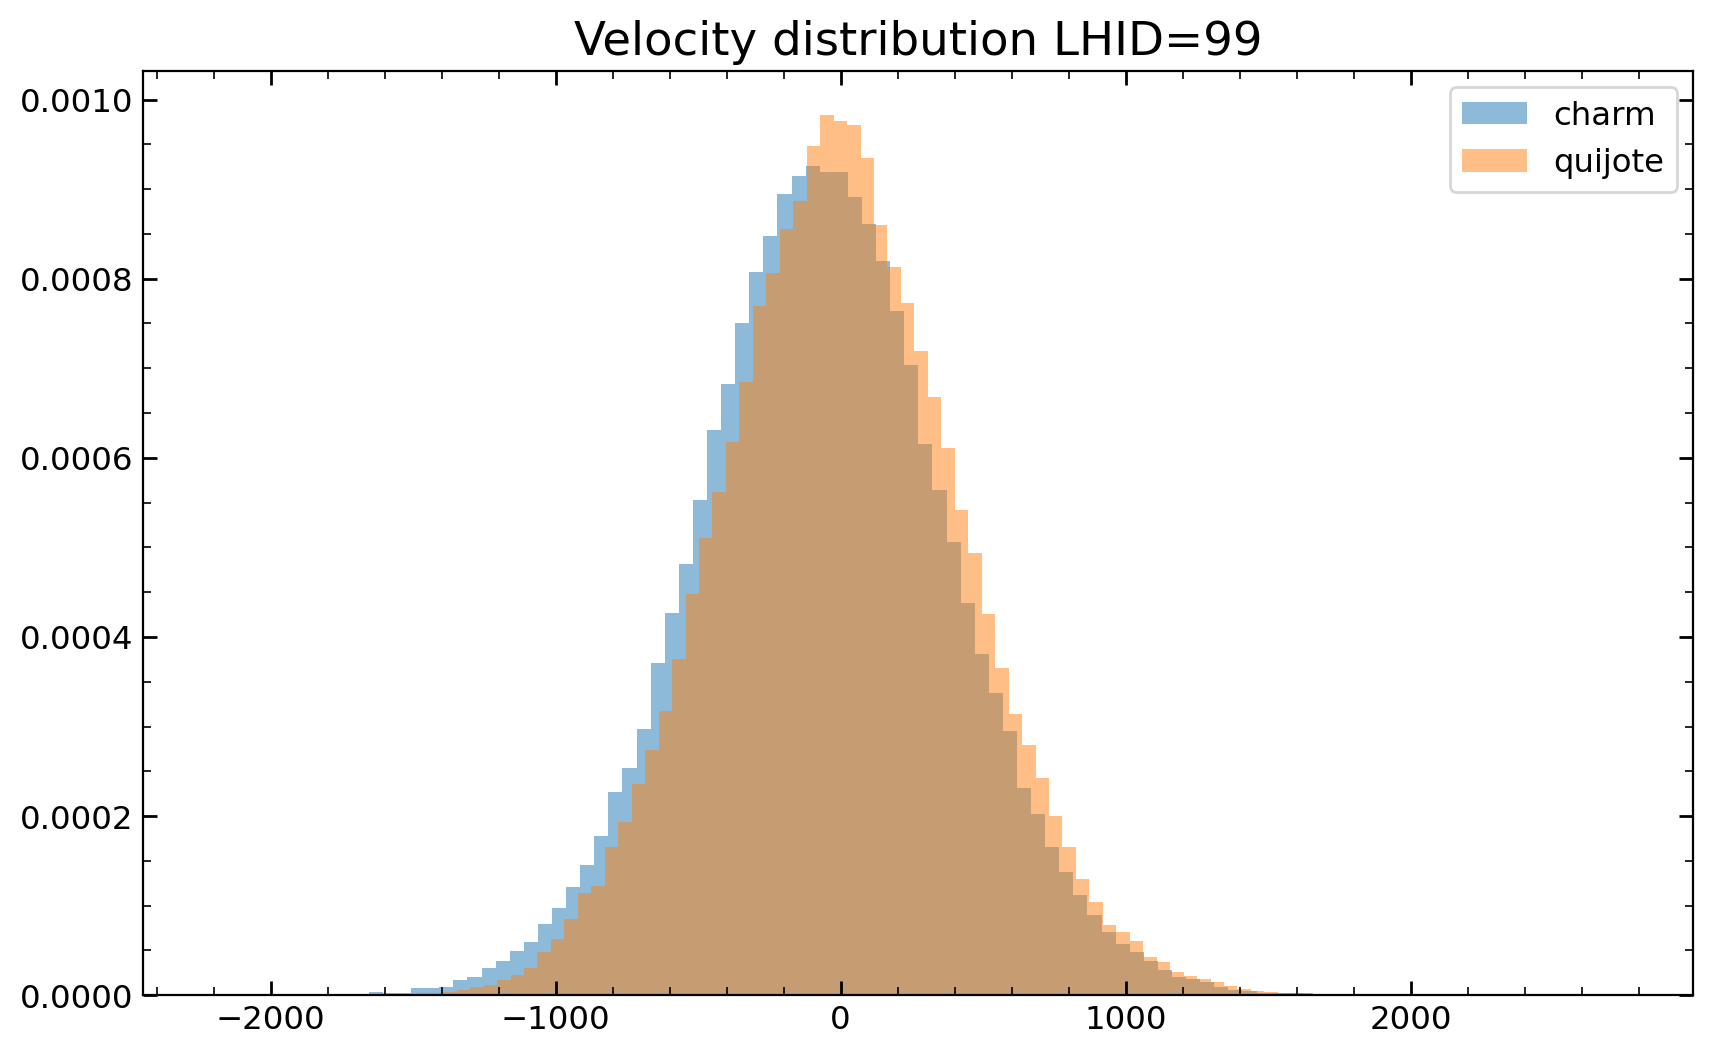

In [179]:
plt.hist(hvel.flatten(), 100, alpha=0.5, label='charm', density=True)
plt.hist(qvel.flatten(), 100, alpha=0.5, label='quijote', density=True)
plt.legend()
plt.title(f'Velocity distribution LHID={lhid}')

In [180]:
hists = np.array(hists)
Pks = np.array(Pks)
zPks = np.array(zPks)

/tmp/ipykernel_3701933/2316338925.py:10: RuntimeWarning: All-NaN slice encountered
  ax.plot(_x, np.nanmedian(hists[:, 0], axis=0))
/anvil/scratch/x-mho1/.conda/envs/cmassrun/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1563: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,


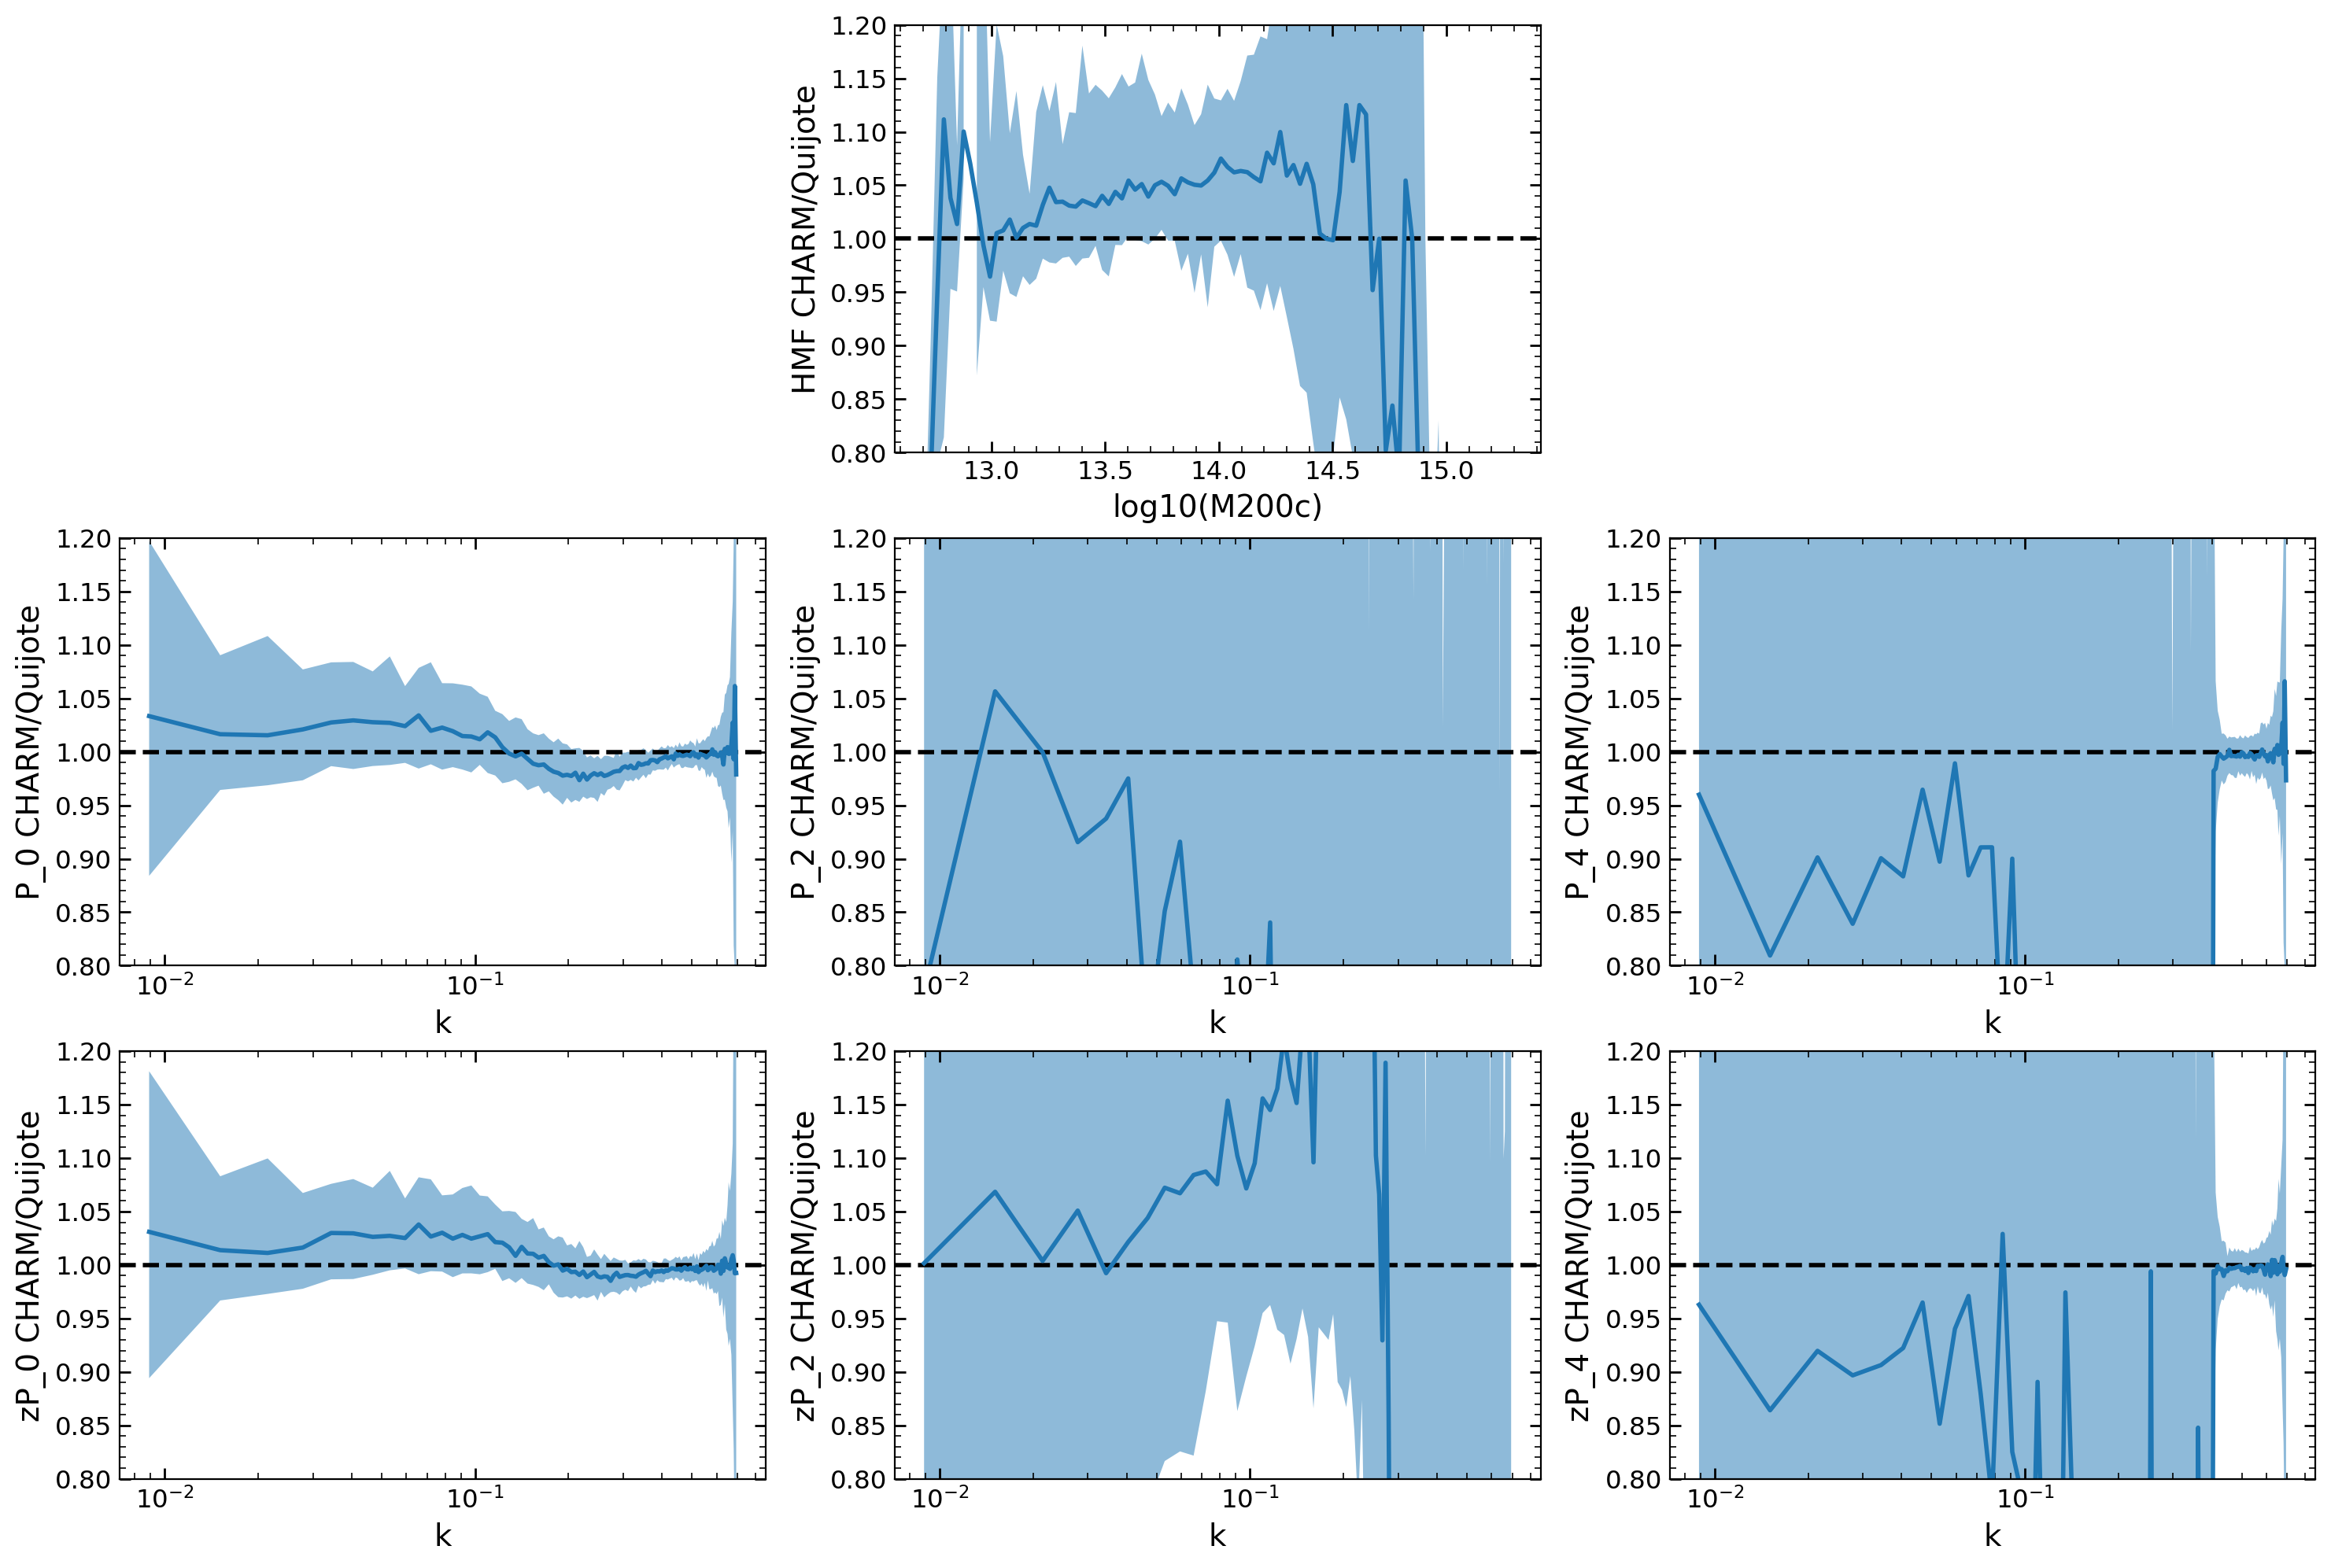

In [181]:
# Plot all
f, axs = plt.subplots(3, 3, figsize=(18, 12))

axs[0, 0].axis('off')
axs[0, 2].axis('off')

ax = axs[0, 1]
ax.axhline(1, color='k', ls='--')
_x = h1[1][:-1] + np.diff(h1[1])/2
ax.plot(_x, np.nanmedian(hists[:, 0], axis=0))
ax.fill_between(
    _x,
    *np.nanpercentile(hists[:, 0], [16, 84], axis=0), alpha=0.5)
ax.set_ylim(0.8, 1.2)
ax.set(xlabel='log10(M200c)', ylabel='HMF CHARM/Quijote')

for i in range(3):
    ax = axs[1, i]
    ax.semilogx()
    ax.axhline(1, color='k', ls='--')
    ax.plot(Pk.k3D, np.nanmedian(Pks[:, :, i], axis=0))
    ax.fill_between(
        Pk.k3D,
        *np.nanpercentile(Pks[:, :, i], [16, 84], axis=0), alpha=0.5)
    ax.set_ylim(0.8, 1.2)
    ax.set(xlabel='k', ylabel=f'P_{2*i} CHARM/Quijote')

for i in range(3):
    ax = axs[2, i]
    ax.semilogx()
    ax.axhline(1, color='k', ls='--')
    ax.plot(Pk.k3D, np.nanmedian(zPks[:, :, i], axis=0))
    ax.fill_between(
        Pk.k3D,
        *np.nanpercentile(zPks[:, :, i], [16, 84], axis=0), alpha=0.5)
    ax.set_ylim(0.8, 1.2)
    ax.set(xlabel='k', ylabel=f'zP_{2*i} CHARM/Quijote')

In [53]:
# Paco's implementation
hposz = deepcopy(hpos).astype(np.float32)
qposz = deepcopy(qpos).astype(np.float32)
RSL.pos_redshift_space(hposz, hvel.astype(np.float32),
                       BoxSize, cosmo.H(0.5).value/cosmo.h, 0.5, axis=0)
RSL.pos_redshift_space(qposz, qvel.astype(np.float32),
                       BoxSize, cosmo.H(0.5).value/cosmo.h, 0.5, axis=0)
hposz = hposz % BoxSize
qposz = qposz % BoxSize


def real_to_redshift(pos, vel, cosmo, z, BoxSize=None, axis=0):
    # Shivam's implementation
    cosmo = cosmo_to_astropy(cosmo)
    Hz = 100.0 * np.sqrt(cosmo.Om0 * (1. + z)**3 + cosmo.Ode0)
    rsd_factor = (1. + z) / Hz
    vel_offset = vel * rsd_factor
    los = np.zeros(3)
    los[axis] = 1
    halo_pos_rsd = pos + vel_offset*los
    if BoxSize is not None:
        halo_pos_rsd = halo_pos_rsd % BoxSize
    return halo_pos_rsd


qnposz = real_to_redshift(qpos, qvel, cosmo, 0.5, BoxSize=1000.0, axis=0)
np.isclose(qposz[:5], qnposz[:5]).all()

True